# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from minisom import MiniSom
import umap.umap_ as umap

from dendogram_func import plot_dendrogram
from silhouette import plot_silhouette
from dbscan_auxiliary_func import get_kdist_plot
from visualization_umap import visualize_dimensionality_reduction_umap
from radar_plot import create_radar_chart
from hierarchical_func import fit_and_predict_clusters

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing the dataset and understanding variables

In [2]:
customer_info = pd.read_csv("customer_info.csv", index_col = "customer_id", parse_dates=['customer_birthdate']).drop(columns = "Unnamed: 0")

C:\Users\joaof\AppData\Local\Temp\ipykernel_23168\3321492438.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_info = pd.read_csv("customer_info.csv", index_col = "customer_id", parse_dates=['customer_birthdate']).drop(columns = "Unnamed: 0")


In [3]:
customer_info

customer_name customer_gender  customer_birthdate  \
customer_id                                                           
39634               David Frink            male 1964-05-15 22:34:00   
43460             Belinda Terry          female 1988-03-26 23:06:00   
23937             Evelyn Calico          female 1969-04-13 18:07:00   
2431                Ora Boggess          female 1941-06-15 03:26:00   
10090             Lonnie Hopson            male 2001-12-18 03:03:00   
...                         ...             ...                 ...   
48487           Amelia Crawford          female 1983-08-28 11:43:00   
24856              Silvia Ramos          female 1992-09-21 19:16:00   
21373             Addie Coronel          female 1994-02-20 05:58:00   
19527            Msc. Mary Ross          female 1989-08-06 16:39:00   
5120         Bsc. Milton Friend            male 1957-06-19 10:53:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
39634              1.0         1.0                1.0   
43460              1.0         0.0                1.0   
23937              0.0         1.0                1.0   
2431               0.0         0.0                0.0   
10090              0.0         0.0                0.0   
...                ...         ...                ...   
48487              1.0         1.0                0.0   
24856              1.0         1.0                1.0   
21373              0.0         0.0                0.0   
19527              1.0         0.0                1.0   
5120               2.0         0.0                2.0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
39634                            2.0                   18306.0   
43460                            2.0                    5015.0   
23937                            3.0                    3097.0   
2431                             1.0                   10825.0   
10090                            1.0                     697.0   
...                              ...                       ...   
48487                            1.0                    7189.0   
24856                            1.0                   11238.0   
21373                            1.0                    6059.0   
19527                            1.0                    3098.0   
5120                             1.0                    6869.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
39634                            7106.0          17.0  ...   
43460                            1334.0           8.0  ...   
23937                            4073.0          10.0  ...   
2431                              207.0          17.0  ...   
10090                             570.0           NaN  ...   
...                                 ...           ...  ...   
48487                            6293.0          17.0  ...   
24856                           11490.0          12.0  ...   
21373                             241.0          12.0  ...   
19527                             425.0           6.0  ...   
5120                             1554.0          10.0  ...   

             lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                
39634                     4056.0                  2174.0   
43460                     1925.0                  2115.0   
23937                     2347.0                  1306.0   
2431                       151.0                    53.0   
10090                      172.0                   587.0   
...                          ...                     ...   
48487                     3779.0                  1748.0   
24856                     3893.0                  1621.0   
21373                      142.0                   179.0   
19527                     

In [4]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 39634 to 5120
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   customer_name                            43631 non-null  object        
 1   customer_gender                          43631 non-null  object        
 2   customer_birthdate                       43631 non-null  datetime64[ns]
 3   kids_home                                43107 non-null  float64       
 4   teens_home                               42610 non-null  float64       
 5   number_complaints                        42977 non-null  float64       
 6   distinct_stores_visited                  42322 non-null  float64       
 7   lifetime_spend_groceries                 43631 non-null  float64       
 8   lifetime_spend_electronics               43631 non-null  float64       
 9   typical_hour                             

In [5]:
customer_info.iloc[:,20:22].info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 39634 to 5120
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year_first_transaction  43631 non-null  float64
 1   loyalty_card_number     24654 non-null  float64
dtypes: float64(2)
memory usage: 1022.6 KB


In [6]:
customer_info.duplicated().sum()

0

In [9]:
customer_info.describe(include="all")

customer_name customer_gender             customer_birthdate  \
count          43631           43631                          43631   
unique         42351               2                            NaN   
top      James Brown          female                            NaN   
freq              10           21910                            NaN   
mean             NaN             NaN  1971-06-10 16:50:52.827118328   
min              NaN             NaN            1940-01-01 21:39:00   
25%              NaN             NaN            1955-10-04 03:23:30   
50%              NaN             NaN            1971-09-02 21:18:00   
75%              NaN             NaN            1987-04-09 15:36:30   
max              NaN             NaN            2001-12-31 18:56:00   
std              NaN             NaN                            NaN   

           kids_home    teens_home  number_complaints  \
count   43107.000000  42610.000000       42977.000000   
unique           NaN           NaN                NaN   
top              NaN           NaN                NaN   
freq             NaN           NaN                NaN   
mean        1.081263      0.847829           0.705726   
min         0.000000      0.000000           0.000000   
25%         0.000000      0.000000           0.000000   
50%         1.000000      1.000000           1.000000   
75%         1.000000      1.000000           1.000000   
max         9.000000      6.000000           9.000000   
std         1.239257      0.840397           0.624624   

        distinct_stores_visited  lifetime_spend_groceries  \
count              42322.000000              43631.000000   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean                   1.669959               5600.030047   
min                    1.000000                  0.000000   
25%                    1.000000               2184.500000   
50%                    1.000000               4071.000000   
75%                    2.000000               6605.500000   
max                    8.000000              26552.000000   
std                    1.034825               4602.647746   

        lifetime_spend_electronics  typical_hour  ...  lifetime_spend_fish  \
count                 43631.000000  41886.000000  ...         42322.000000   
unique                         NaN           NaN  ...                  NaN   
top                            NaN           NaN  ...                  NaN   
freq                           NaN           NaN  ...                  NaN   
mean                   2000.058468     13.520580  ...          1471.423846   
min                       0.000000      6.000000  ...             0.000000   
25%                     218.000000     10.000000  ...           187.000000   
50%                     574.000000     13.000000  ...           641.000000   
75%                    2565.500000     17.000000  ...          1570.000000   
max                   21273.000000     24.000000  ...         50381.000000   
std                    3004.924537      4.558057  ...          3910.163766   

        lifetime_spend_hygiene  lifetime_spend_videogames  \
count             43631.000000               43631.000000   
unique                     NaN                        NaN   
top                        NaN                        NaN   
freq                       NaN                        NaN   
mean                916.948408                 990.334922   
min                   0.000000                   0.000000   
25%                 372.000000                 204.000000   
50%                 668.000000                 557.000000   
75%                1437.000000                1111.000000   
max                3487.000000                5389.000000   
std                 729.744050                1241.658577   

        lifetime_spend_petfood  lifetime_total_distinct_products  

# Some visualizations

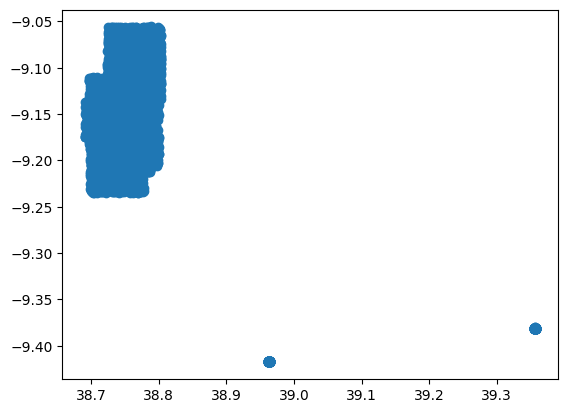

In [10]:
#Plotting longitude and latitude
plt.scatter(x = customer_info["latitude"], y= customer_info["longitude"])
plt.show()

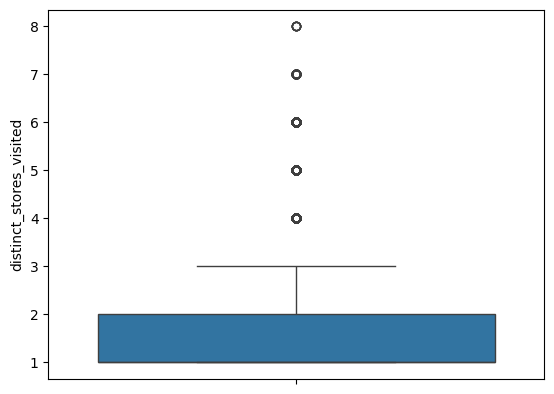

In [11]:
sns.boxplot(data = customer_info, y = "distinct_stores_visited")
plt.show()

In [12]:
customer_info[["lifetime_spend_fish"]]

lifetime_spend_fish
customer_id                     
39634                     4056.0
43460                     1925.0
23937                     2347.0
2431                       151.0
10090                      172.0
...                          ...
48487                     3779.0
24856                     3893.0
21373                      142.0
19527                        0.0
5120                      1221.0

[43631 rows x 1 columns]

In [13]:
customer_info[["lifetime_spend_fish"]].value_counts()

lifetime_spend_fish
1.0                    3298
0.0                    2624
2.0                     865
3.0                     101
318.0                    42
                       ... 
3079.0                    1
3077.0                    1
3067.0                    1
3065.0                    1
50381.0                   1
Name: count, Length: 4770, dtype: int64

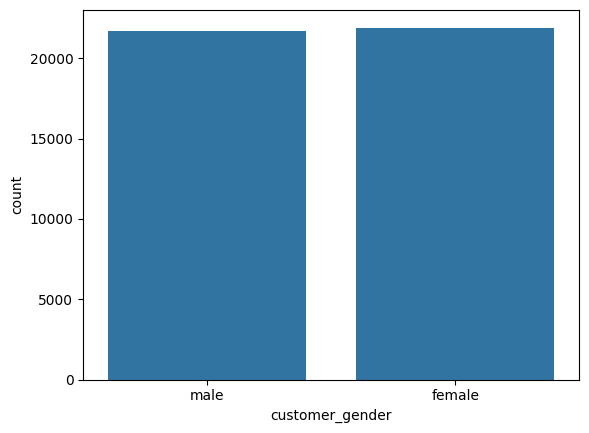

In [14]:
sns.countplot(x='customer_gender', data=customer_info)
plt.show()

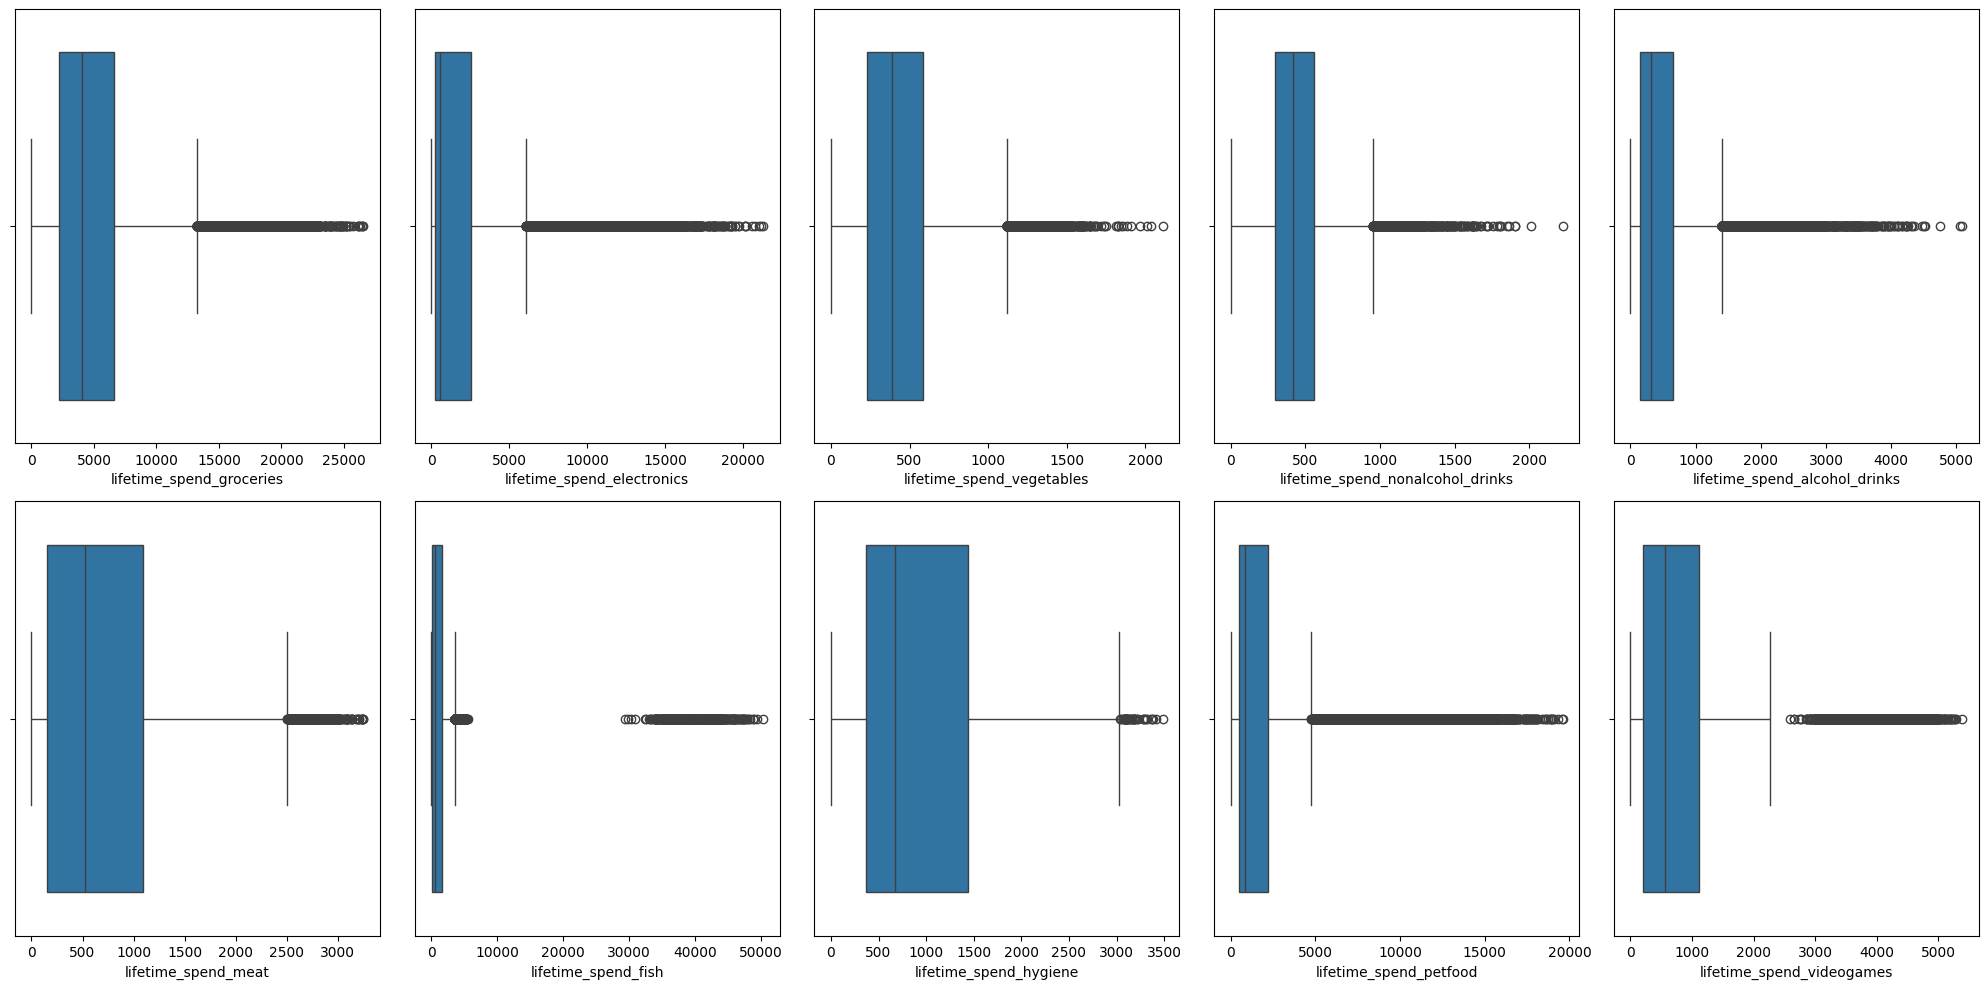

In [15]:
columns = ['lifetime_spend_groceries','lifetime_spend_electronics', 'lifetime_spend_vegetables',
           'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
            'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
             'lifetime_spend_petfood', 'lifetime_spend_videogames']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
for i, column in enumerate(columns):
        if i// 5 == 0:
                sns.boxplot(x=customer_info[column], ax=axes[0][i])
        else:
                sns.boxplot(x=customer_info[column], ax=axes[1][i-5])
plt.tight_layout()   
plt.show()

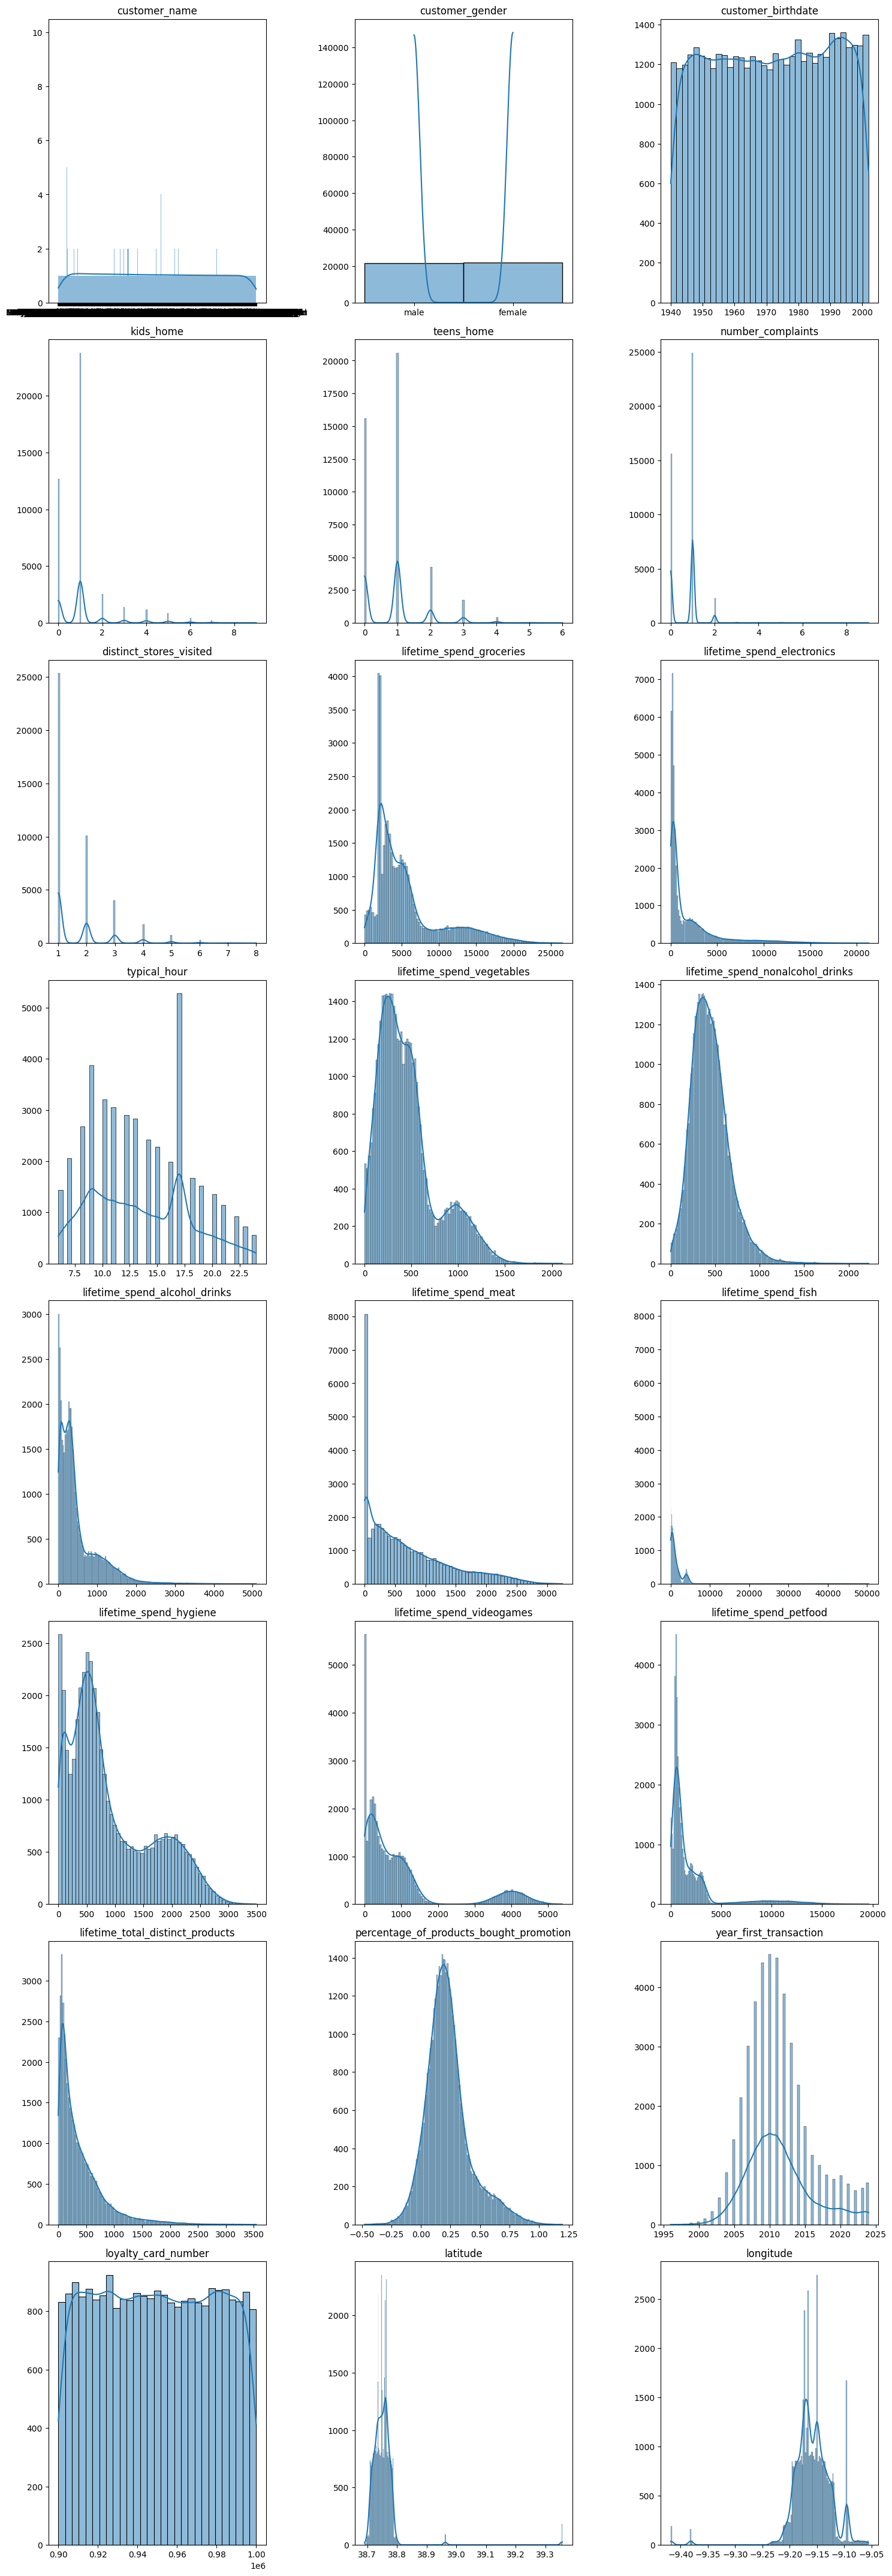

In [16]:
columns_to_visualize = customer_info.columns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(columns_to_visualize)//3 + 1, ncols=3, figsize=(15, len(columns_to_visualize) * 2))

axes = axes.flatten()

# Loop through the columns and create a plot for each
for i, column in enumerate(columns_to_visualize):
    sns.histplot(customer_info[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


# Looking for some outliers in fish spend

In [3]:
customer_info[customer_info["lifetime_spend_fish"] >6000]

customer_name customer_gender  customer_birthdate  kids_home  \
customer_id                                                                     
48086          Charles`s Fishy            male 1966-09-04 09:18:00        0.0   
31838           Ursula`s Fishy          female 1963-09-20 15:37:00        0.0   
41519          Lindsay`s Fishy          female 1956-07-27 18:05:00        0.0   
41076            Carol`s Fishy          female 1942-07-18 08:53:00        0.0   
43120          Rosetta`s Fishy          female 1980-03-30 19:34:00        0.0   
...                        ...             ...                 ...        ...   
24463        Stephanie`s Fishy          female 1956-04-10 18:50:00        0.0   
12487          Derrick`s Fishy            male 1973-02-20 00:04:00        0.0   
14727            Tyler`s Fishy            male 1985-01-10 03:28:00        0.0   
46634           Kendra`s Fishy          female 1945-11-02 11:33:00        0.0   
20914             Anna`s Fishy          female 1994-08-26 03:33:00        0.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
48086               0.0                1.0                      1.0   
31838               0.0                1.0                      1.0   
41519               0.0                0.0                      1.0   
41076               0.0                0.0                      1.0   
43120               0.0                1.0                      1.0   
...                 ...                ...                      ...   
24463               0.0                1.0                      1.0   
12487               0.0                0.0                      1.0   
14727               0.0                1.0                      1.0   
46634               1.0                0.0                      1.0   
20914               0.0                1.0                      1.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
48086                         14998.0                        49.0   
31838                         13837.0                       104.0   
41519                         14680.0                       167.0   
41076                         15110.0                       357.0   
43120                         16945.0                       200.0   
...                               ...                         ...   
24463                         16382.0                        77.0   
12487                         17416.0                       170.0   
14727                         14184.0                       158.0   
46634                         14685.0                        17.0   
20914                         14060.0                        13.0   

             typical_hour  ...  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                ...                                                
48086                 7.0  ...              48432.0                    82.0   
31838                 9.0  ...              45651.0                   101.0   
41519                 9.0  ...              38525.0                   148.0   
41076                12.0  ...              34035.0                    80.0   
43120                 9.0  ...              39154.0                    20.0   
...                   ...  ...                  ...                     ...   
24463                17.0  ...              40584.0                   136.0   
12487                17.0  ...              40936.0                    72.0   
14727                 9.0  ...              40034.0                   101.0   
46634                17.0  ...              49025.0                   118.0   
20914                 9.0  ...              44585.0                    77.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                    

In [4]:
customer_info[customer_info["customer_name"].str.contains("Fishy")]

customer_name customer_gender  customer_birthdate  kids_home  \
customer_id                                                                     
48086          Charles`s Fishy            male 1966-09-04 09:18:00        0.0   
31838           Ursula`s Fishy          female 1963-09-20 15:37:00        0.0   
41519          Lindsay`s Fishy          female 1956-07-27 18:05:00        0.0   
41076            Carol`s Fishy          female 1942-07-18 08:53:00        0.0   
43120          Rosetta`s Fishy          female 1980-03-30 19:34:00        0.0   
...                        ...             ...                 ...        ...   
24463        Stephanie`s Fishy          female 1956-04-10 18:50:00        0.0   
12487          Derrick`s Fishy            male 1973-02-20 00:04:00        0.0   
14727            Tyler`s Fishy            male 1985-01-10 03:28:00        0.0   
46634           Kendra`s Fishy          female 1945-11-02 11:33:00        0.0   
20914             Anna`s Fishy          female 1994-08-26 03:33:00        0.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
48086               0.0                1.0                      1.0   
31838               0.0                1.0                      1.0   
41519               0.0                0.0                      1.0   
41076               0.0                0.0                      1.0   
43120               0.0                1.0                      1.0   
...                 ...                ...                      ...   
24463               0.0                1.0                      1.0   
12487               0.0                0.0                      1.0   
14727               0.0                1.0                      1.0   
46634               1.0                0.0                      1.0   
20914               0.0                1.0                      1.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
48086                         14998.0                        49.0   
31838                         13837.0                       104.0   
41519                         14680.0                       167.0   
41076                         15110.0                       357.0   
43120                         16945.0                       200.0   
...                               ...                         ...   
24463                         16382.0                        77.0   
12487                         17416.0                       170.0   
14727                         14184.0                       158.0   
46634                         14685.0                        17.0   
20914                         14060.0                        13.0   

             typical_hour  ...  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                ...                                                
48086                 7.0  ...              48432.0                    82.0   
31838                 9.0  ...              45651.0                   101.0   
41519                 9.0  ...              38525.0                   148.0   
41076                12.0  ...              34035.0                    80.0   
43120                 9.0  ...              39154.0                    20.0   
...                   ...  ...                  ...                     ...   
24463                17.0  ...              40584.0                   136.0   
12487                17.0  ...              40936.0                    72.0   
14727                 9.0  ...              40034.0                   101.0   
46634                17.0  ...              49025.0                   118.0   
20914                 9.0  ...              44585.0                    77.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                    

# Rebuilding some variables

In [5]:
customer_info['Age'] = (pd.to_datetime('2024-05-01') - customer_info['customer_birthdate']).dt.days // 365.25

In [6]:
customer_info["loyalty_card"] = customer_info["loyalty_card_number"].notnull().astype(int)

In [7]:
customer_info = pd.get_dummies(customer_info, columns= ["customer_gender"], drop_first= True)

In [8]:
customer_info["customer_gender_male"] = customer_info["customer_gender_male"].apply(lambda x: 1 if x == True else 0)

# Dataframe for clustering

In [9]:
# Dataframe without the fishermen cluster
customers = customer_info[~customer_info["customer_name"].str.contains("Fishy")]

In [10]:
customers = customers.drop(columns = ["customer_name", "customer_birthdate", "loyalty_card_number", "loyalty_card", "customer_gender_male", "typical_hour"])

# Dataframe with the fishermen outliers

In [11]:
out_fishermen = customer_info[customer_info["customer_name"].str.contains("Fishy")]

In [12]:
out_fishermen = out_fishermen.drop(columns = ["customer_name", "customer_birthdate", "loyalty_card_number", "loyalty_card", "customer_gender_male", "typical_hour"])

# Standardizing Variables

In [13]:
mm = MinMaxScaler().fit(customers)
customers_mm = mm.transform(customers)

In [14]:
customers_scalled = pd.DataFrame(customers_mm, columns = customers.columns, index = customers.index)

<Axes: >

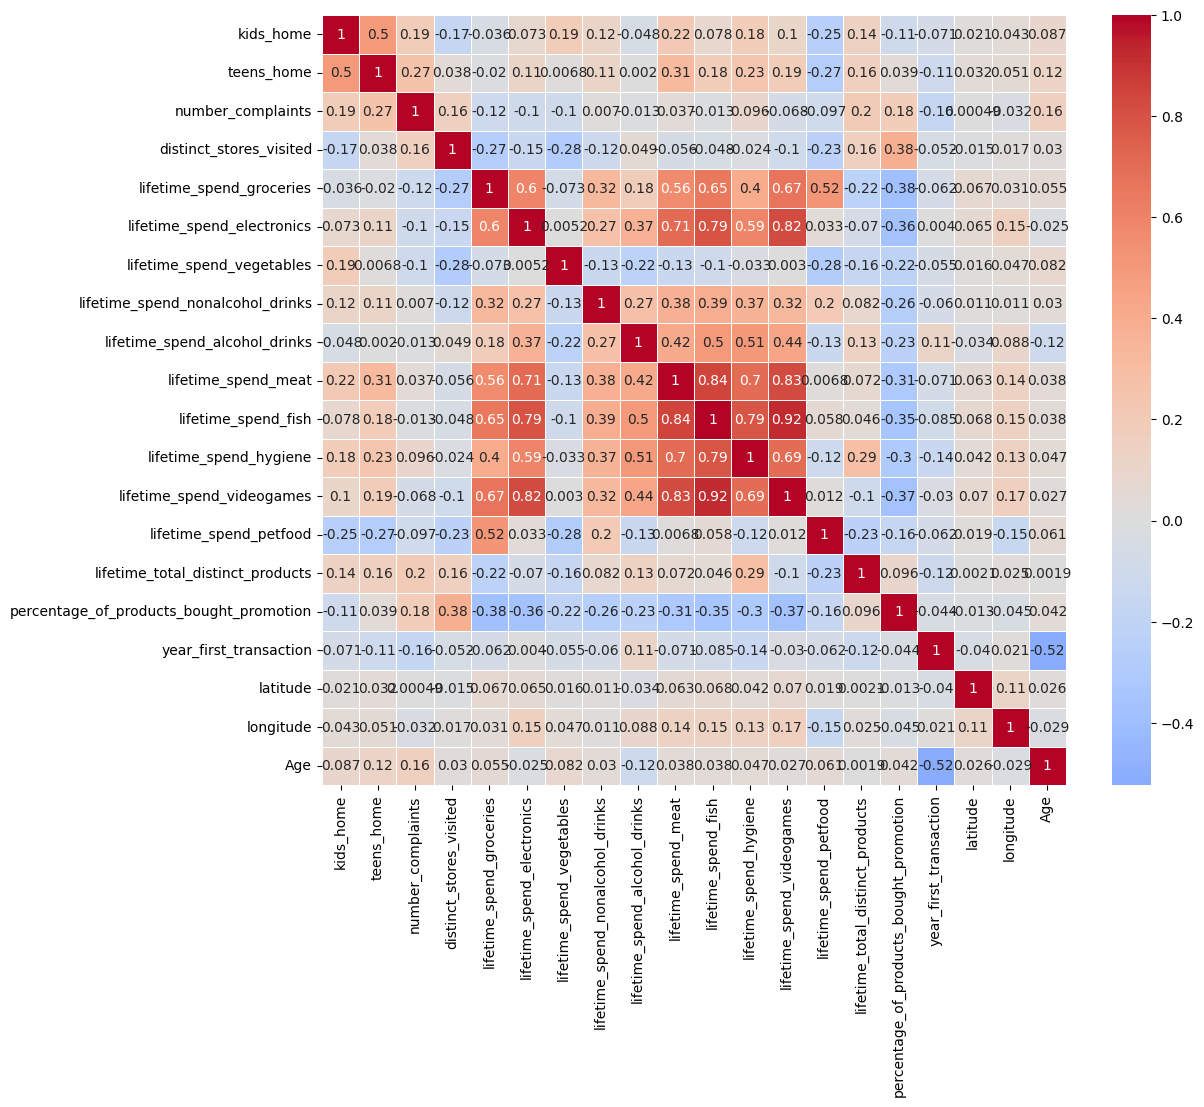

In [15]:
correlation_matrix = customers_scalled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
    
# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

Fish with high correlation with a lot of variables so we tried to remove it but got worse results

# Imputing Missing Values

In [16]:
knn = KNNImputer(n_neighbors= 5).fit(customers_scalled)

In [17]:
customers_imputed = knn.transform(customers_scalled)

In [18]:
cust_prepoc= pd.DataFrame(customers_imputed, columns = customers.columns, index = customers.index)

In [19]:
cust_prepoc.head()

kids_home  teens_home  number_complaints  \
customer_id                                             
39634         0.111111    0.166667           0.111111   
43460         0.111111    0.000000           0.111111   
23937         0.000000    0.166667           0.111111   
2431          0.000000    0.000000           0.000000   
10090         0.000000    0.000000           0.000000   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
39634                       0.142857                  0.689440   
43460                       0.142857                  0.188875   
23937                       0.285714                  0.116639   
2431                        0.000000                  0.407691   
10090                       0.000000                  0.026250   

             lifetime_spend_electronics  lifetime_spend_vegetables  \
customer_id                                                          
39634                          0.334038                   0.229167   
43460                          0.062709                   0.162879   
23937                          0.191463                   0.142519   
2431                           0.009731                   0.072443   
10090                          0.026795                   0.003788   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
39634                                0.271583                       0.185229   
43460                                0.168165                       0.239049   
23937                                0.383094                       0.340012   
2431                                 0.113309                       0.011786   
10090                                0.014838                       0.556472   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
39634                   0.684923             0.732659                0.623459   
43460                   0.328615             0.347724                0.606539   
23937                   0.137231             0.423952                0.374534   
2431                    0.087692             0.027276                0.015199   
10090                   0.016615             0.031069                0.168340   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
39634                         0.732232                0.128291   
43460                         0.190759                0.101398   
23937                         0.279087                0.102980   
2431                          0.000000                0.211012   
10090                         0.041381                0.003266   

             lifetime_total_distinct_products  \
customer_id                                     
39634                                0.009029   
43460                                0.724041   
23937                                0.361738   
2431                                 0.019752   
10090                                0.001129   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
39634                                       0.328503                0.500000   
43460                                       0.408523                0.642857   
23937                                       0.366693                0.464286   
2431                                        0.414270                0.392857   
10090                                       0.393475                1.000000   

             latitude  longitude       Age  
customer_id                                 
39634        0.397470   0.478999  0.596774  
43460        0.636523   0.4

# KMeans clustering

In [20]:
# Calculating the distances in order to find out the optimal number of clusters
dispersion = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cust_prepoc)
    dispersion.append(kmeans.inertia_)

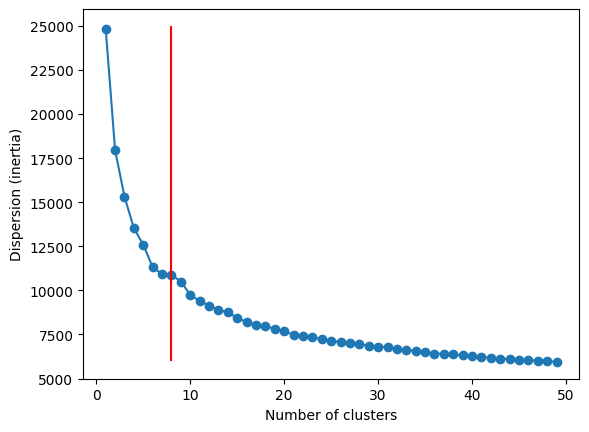

In [21]:
plt.plot(range(1, 50), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.vlines(8, 6000, 25000, color='red')
plt.show()

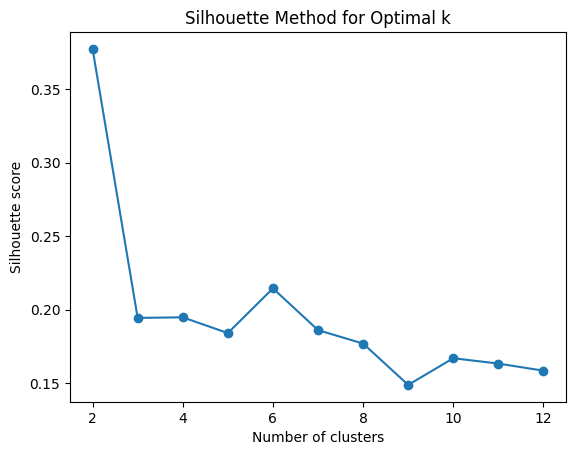

In [22]:
#Plotting the silhouette graph
plot_silhouette(cust_prepoc, max_clusters= 12)

In [23]:
# Create a K-means solution with 100 clusters to then apply the hierarchic clustering to obtain the best number of clusters
cust_copy = cust_prepoc.copy()
kmeans = KMeans(n_clusters=100, random_state=0).fit(cust_prepoc)
cust_copy['cluster_kmeans'] = kmeans.predict(cust_prepoc)

In [24]:
#From the dataset created above (that is a copy of the one after preprocessing) group by centroid 
#so we get the average per centroid to use in the agglomerative clustering

agg_knn = cust_copy.groupby("cluster_kmeans").mean()

In [25]:
# Create the hierarchical algorithm to find the best number of clusters
agg_clust = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None).fit(agg_knn)

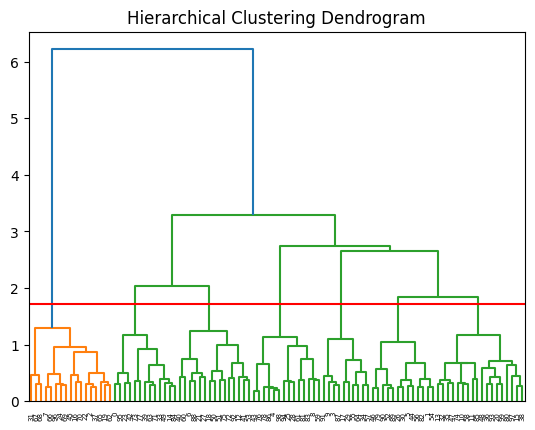

In [26]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 1.725, color = 'r', linestyle = '-')
plt.show()

In [27]:
kmeans_final = KMeans(n_clusters = 8, random_state=0).fit(cust_prepoc)
cust_prepoc["kmeans_cluster"] = kmeans_final.predict(cust_prepoc)

# SOM clustering

In [28]:
cust_prepoc_array = np.array(cust_prepoc.iloc[:, :-1])

In [29]:
som = MiniSom(
    5,
    3,
    cust_prepoc.iloc[:, :-1].shape[1],
    sigma=0.3,
    learning_rate=0.7,
    neighborhood_function='gaussian',
    random_seed=0
    )

In [30]:
np.random.seed(0)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(data = cust_prepoc_array, num_iteration= i)
    q_errors.append(som.quantization_error(cust_prepoc_array))

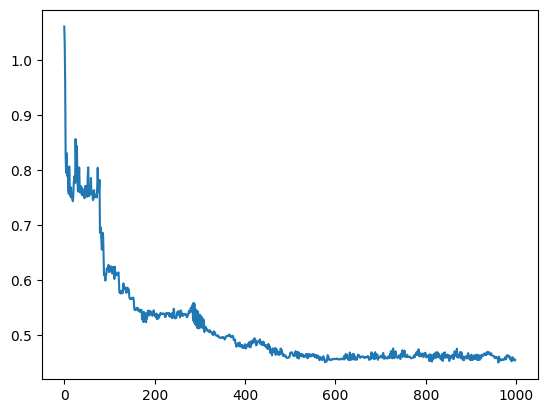

In [31]:
plt.plot(q_errors)

In [32]:
som.train(cust_prepoc_array, 500)
cust_prepoc['winner_node'] = (
    [som.winner(cust_prepoc_array[i]) for i in range(0, len(cust_prepoc_array))]
)

In [33]:
cust_prepoc["winner_node"].unique()

array([(0, 2), (1, 1), (3, 1), (1, 0), (2, 0), (2, 1), (4, 0), (3, 2),
       (2, 2), (3, 0), (1, 2), (0, 0), (0, 1), (4, 2), (4, 1)],
      dtype=object)

In [34]:
dict = {}
i = 0
lt = []
for ele in cust_prepoc["winner_node"]:
    if ele in dict:
        lt.append(dict[ele]) 
    else:
        dict[ele] = i
        lt.append(dict[ele])
        i += 1

In [35]:
cust_prepoc["winner_node"] = pd.Series(lt)

In [36]:
cust_prepoc

kids_home  teens_home  number_complaints  \
customer_id                                             
39634         0.111111    0.166667           0.111111   
43460         0.111111    0.000000           0.111111   
23937         0.000000    0.166667           0.111111   
2431          0.000000    0.000000           0.000000   
10090         0.000000    0.000000           0.000000   
...                ...         ...                ...   
48487         0.111111    0.166667           0.000000   
24856         0.111111    0.166667           0.111111   
21373         0.000000    0.000000           0.000000   
19527         0.111111    0.000000           0.111111   
5120          0.222222    0.000000           0.222222   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
39634                       0.142857                  0.689440   
43460                       0.142857                  0.188875   
23937                       0.285714                  0.116639   
2431                        0.000000                  0.407691   
10090                       0.000000                  0.026250   
...                              ...                       ...   
48487                       0.000000                  0.270752   
24856                       0.000000                  0.423245   
21373                       0.000000                  0.228194   
19527                       0.000000                  0.116677   
5120                        0.000000                  0.258700   

             lifetime_spend_electronics  lifetime_spend_vegetables  \
customer_id                                                          
39634                          0.334038                   0.229167   
43460                          0.062709                   0.162879   
23937                          0.191463                   0.142519   
2431                           0.009731                   0.072443   
10090                          0.026795                   0.003788   
...                                 ...                        ...   
48487                          0.295821                   0.321023   
24856                          0.540121                   0.285038   
21373                          0.011329                   0.136837   
19527                          0.019978                   0.410038   
5120                           0.073050                   0.126894   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
39634                                0.271583                       0.185229   
43460                                0.168165                       0.239049   
23937                                0.383094                       0.340012   
2431                                 0.113309                       0.011786   
10090                                0.014838                       0.556472   
...                                       ...                            ...   
48487                                0.333183                       0.125516   
24856                                0.250450                       0.295227   
21373                                0.188849                       0.008446   
19527                                0.165917                       0.043606   
5120                                 0.296313                       0.215478   

             lifetime_spend_meat  ...  lifetime_spend_videogames  \
customer_id                       ...                              
39634                   0.684923  ...                   0.732232   
43460                   0.328615  ...                   0.190759   
23937                   0.137231  ...                   0.279087   
2431                    0.087692  ...                   0.000000   
10090                   0.016615  ...               

## DBScan

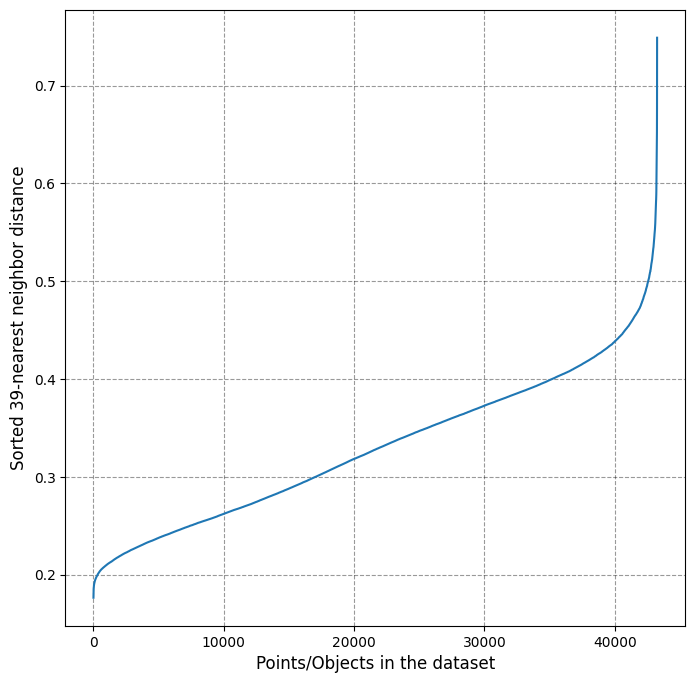

In [37]:
k = 2 * cust_prepoc.iloc[:, :-2].shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=cust_prepoc.iloc[:, :-2], k=k)

In [38]:
cust_prepoc['dbscan_clustering'] = DBSCAN(
    eps=0.5, min_samples=k
    ).fit_predict(cust_prepoc.iloc[:, :-2])

In [39]:
cust_prepoc['dbscan_clustering'].value_counts()

dbscan_clustering
 0    43221
-1       22
Name: count, dtype: int64

## UMAP

### UMAP for Kmeans solution

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


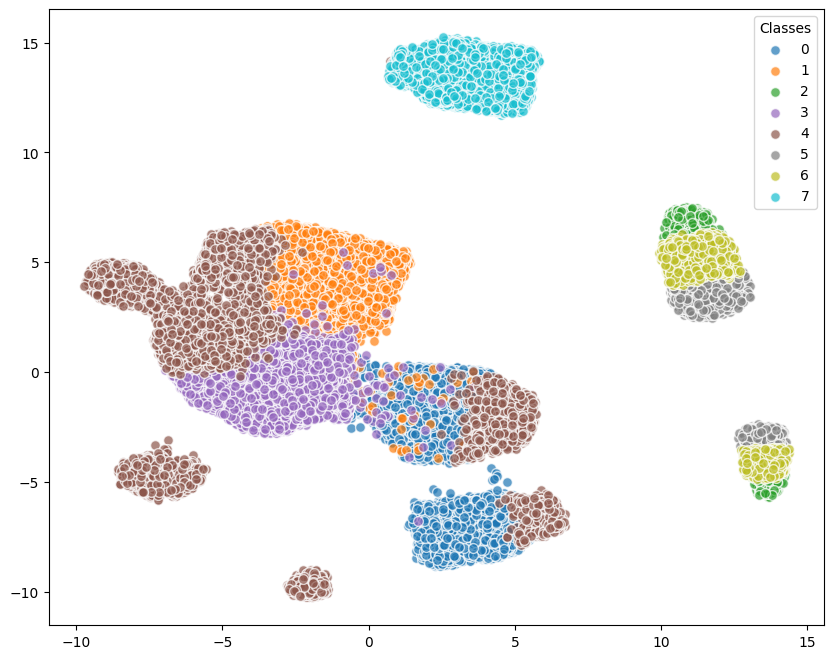

In [40]:
umap_object = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=0)
cust_prepoc = cust_prepoc.sort_index()
umap_embedding = umap_object.fit_transform(cust_prepoc.iloc[:, :-3])
visualize_dimensionality_reduction_umap(umap_embedding, cust_prepoc.iloc[:,-3].sort_index())

### UMAP for SOM solution

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


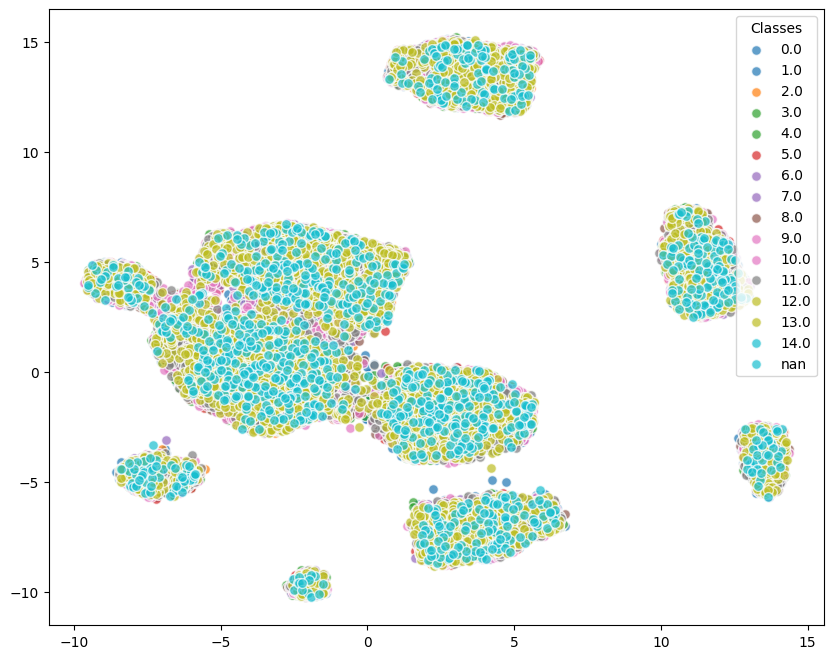

In [41]:
umap_object = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=0)
cust_prepoc = cust_prepoc.sort_index()
umap_embedding = umap_object.fit_transform(cust_prepoc.iloc[:, :-3])
visualize_dimensionality_reduction_umap(umap_embedding, cust_prepoc.iloc[:,-2].sort_index())

### UMAP for DBScan solution

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


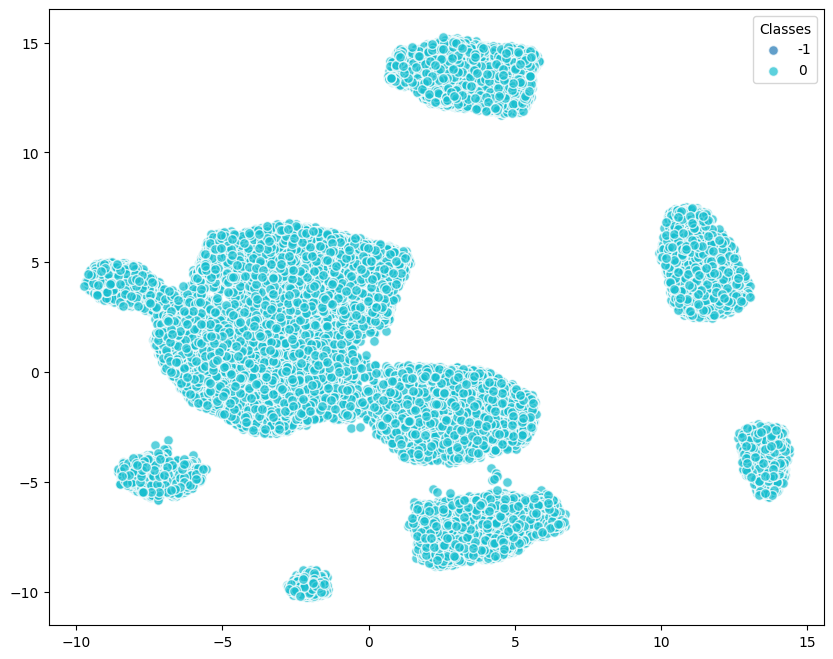

In [42]:
umap_object = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=0)
cust_prepoc = cust_prepoc.sort_index()
umap_embedding = umap_object.fit_transform(cust_prepoc.iloc[:, :-3])
visualize_dimensionality_reduction_umap(umap_embedding, cust_prepoc.iloc[:,-1].sort_index())

After seeing the three umaps we can see the best solution is the one given by kmeans however it can be improved so we will do another kmeans to try and separate the confusion between clusters 0, 1 and 3

# Kmeans to try to improve initial solution

In [43]:
obs = cust_prepoc[cust_prepoc["kmeans_cluster"].isin([0,1,3])].drop(columns = ["kmeans_cluster", "winner_node", "dbscan_clustering"])

In [44]:
# Calculating the distances in order to find out the optimal number of clusters
dispersion = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(obs)
    dispersion.append(kmeans.inertia_)

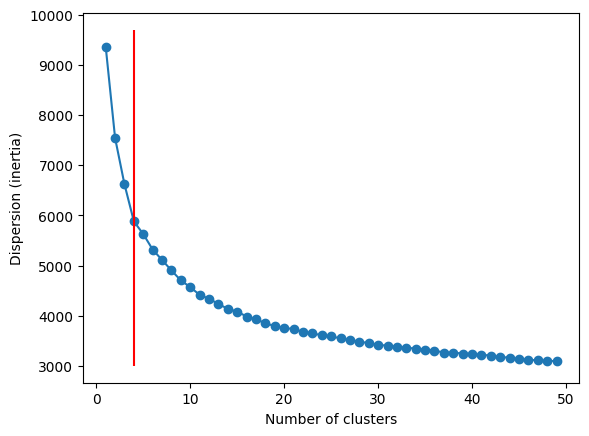

In [45]:
plt.plot(range(1, 50), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.vlines(4, 3000, 9700, color='red')
plt.show()

In [46]:
# Create a K-means solution with 100 clusters to then apply the hierarchic clustering to obtain the best number of clusters
cust_copy = obs.copy()
kmeans = KMeans(n_clusters=100, random_state=0).fit(cust_copy)
cust_copy['cluster_kmeans'] = kmeans.predict(cust_copy)

agg_knn = cust_copy.groupby("cluster_kmeans").mean()

agg_clust = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None).fit(agg_knn)

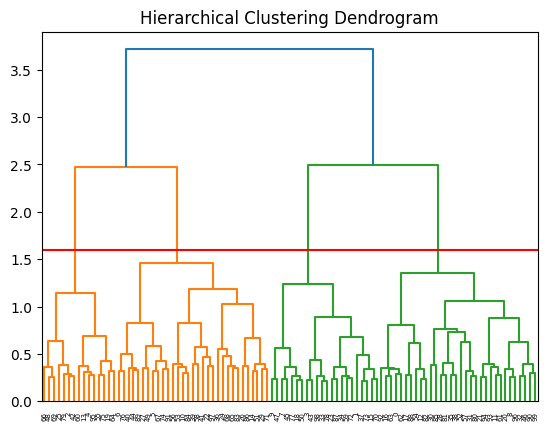

In [47]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 1.6, color = 'r', linestyle = '-')
plt.show()

In [48]:
kmeans_final = KMeans(n_clusters = 4, random_state=0).fit(obs)
obs["kmeans_cluster"] = kmeans_final.predict(obs)

### UMAP visualization of the improvement

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


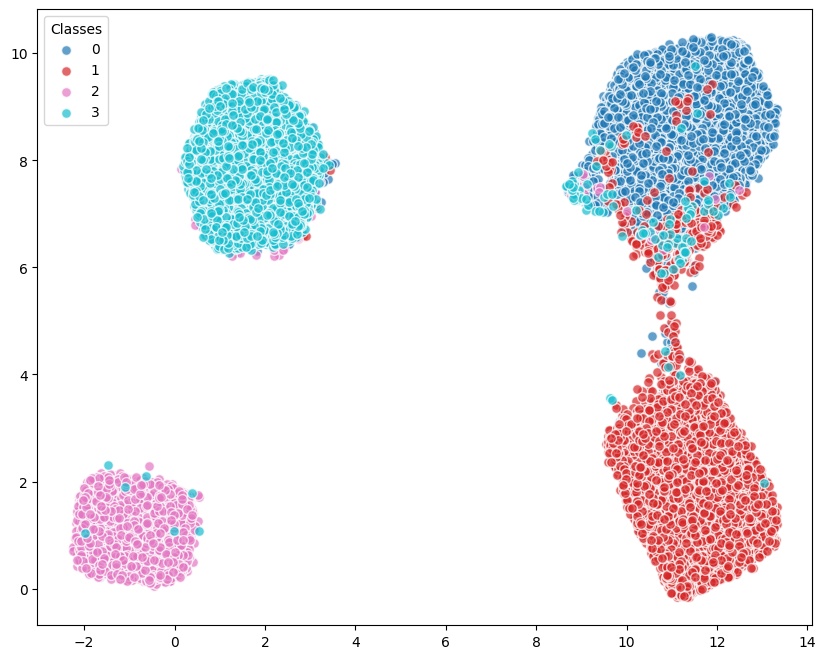

In [50]:
umap_object = umap.UMAP(n_neighbors=100, min_dist=0.1, random_state=0)
obs = obs.sort_index()
umap_embedding = umap_object.fit_transform(obs.iloc[:, :-1])
visualize_dimensionality_reduction_umap(umap_embedding, obs.iloc[:,-1].sort_index())

It can still be seen a bit of confusion but much better than originally

# Cluster Analysis

In [51]:
def map_values(x):
    """Function that changes the value of a given x

    Args:
        x (float): value of the cluster in the dataset originally

    Returns:
        float: value of the cluster in the dataset after the transformation
    """
    if x == 0:
        return 0
    elif x == 1:
        return 1
    elif x == 2:
        return 3
    elif x == 3:
        return 8



## Pie Chart with size of clusters

In [55]:
first_clusters = cust_prepoc[~cust_prepoc["kmeans_cluster"].isin([0,1,3])]
obs["kmeans_cluster"] = obs["kmeans_cluster"].apply(map_values)
clusters = pd.concat([first_clusters, obs])
cust_kmeans_clusters = clusters[["kmeans_cluster"]]
og_cluster = customer_info.merge(cust_kmeans_clusters, on='customer_id', how= "left")
og_cluster["kmeans_cluster"] = og_cluster["kmeans_cluster"].fillna(9)

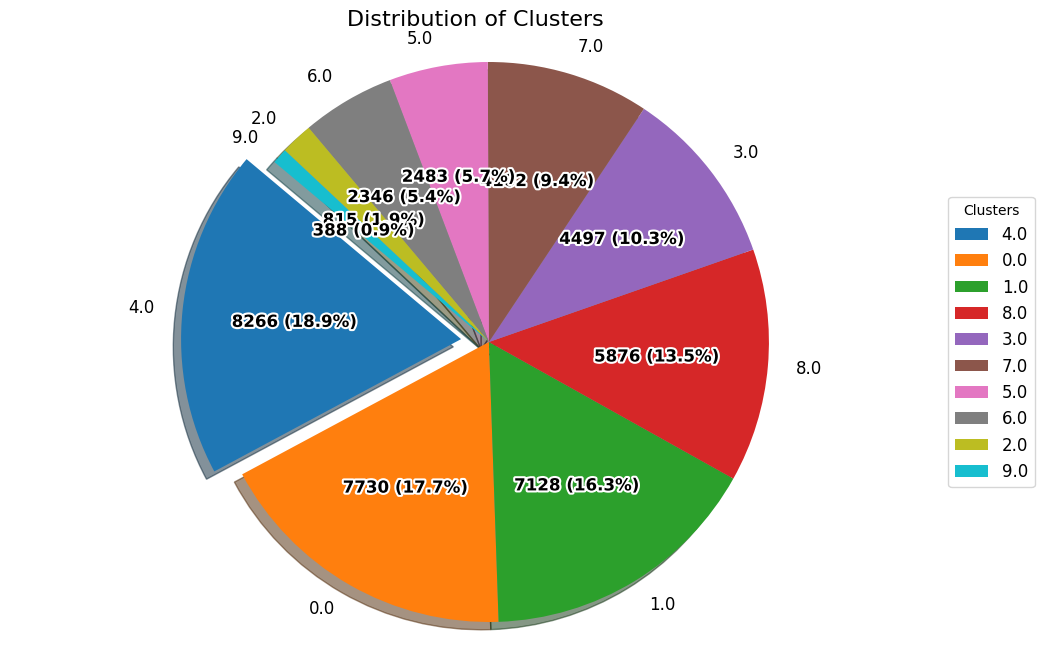

In [56]:
cluster_counts = og_cluster["kmeans_cluster"].value_counts()

# Define a color palette with 10 distinct colors using Seaborn
colors = sns.color_palette('tab10', 10)


# Create an explode list with the first slice exploded
explode = [0.1 if i == 0 else 0 for i in range(len(cluster_counts))]


# Plotting the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(cluster_counts, labels=cluster_counts.index,
                                  autopct=lambda pct: f'{int(round(pct*sum(cluster_counts)/100.0))} ({pct:.1f}%)', startangle=140, colors=colors,
                                  shadow=True, explode=explode, textprops={'fontsize': 12})

# Adding a legend
ax.legend(wedges, cluster_counts.index, title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Adding path effects to the text for better visibility
for text in autotexts:
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()])

# Title and adjustments
plt.setp(autotexts, size=12, weight="bold")
ax.set_title('Distribution of Clusters', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## Bar plots comparing not scaled variables

In [57]:
mean_clusters = og_cluster.groupby("kmeans_cluster").agg({
    'kids_home': np.mean,
    'teens_home': np.mean,
    'number_complaints': np.mean,
    'distinct_stores_visited': np.mean,
    'lifetime_spend_groceries': np.mean,
    'lifetime_spend_electronics': np.mean,
    'typical_hour': np.mean,
    'lifetime_spend_vegetables': np.mean,
    'lifetime_spend_nonalcohol_drinks': np.mean,
    'lifetime_spend_alcohol_drinks': np.mean,
    'lifetime_spend_meat': np.mean,
    'lifetime_spend_fish': np.mean,
    'lifetime_spend_hygiene': np.mean,
    'lifetime_spend_videogames': np.mean,
    'lifetime_spend_petfood': np.mean,
    'lifetime_total_distinct_products': np.mean,
    'percentage_of_products_bought_promotion': np.mean,
    'year_first_transaction': np.mean,
    'loyalty_card_number': np.mean,
    'latitude': np.mean,
    'longitude': np.mean,
    'Age': np.mean,
    'loyalty_card': np.mean,
    'customer_gender_male': np.mean,
})


C:\Users\joaof\AppData\Local\Temp\ipykernel_23168\199508456.py:1: FutureWarning: The provided callable <function mean at 0x000001F9AD3D1F80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_clusters = og_cluster.groupby("kmeans_cluster").agg({


In [58]:
mean_clusters

kids_home  teens_home  number_complaints  \
kmeans_cluster                                             
0.0              0.615073    0.966234           0.982295   
1.0              0.992609    0.442943           0.512594   
2.0              0.997522    0.997497           0.506219   
3.0              0.997528    0.830412           1.015360   
4.0              0.791529    0.571057           0.480807   
5.0              1.002444    0.997103           0.492031   
6.0              1.002587    0.994778           0.508445   
7.0              0.000000    0.011970           0.502602   
8.0              3.172580    2.081939           1.006041   
9.0              0.023560    0.031250           0.506562   

                distinct_stores_visited  lifetime_spend_groceries  \
kmeans_cluster                                                      
0.0                            2.953721               2085.978913   
1.0                            1.227036               2940.065937   
2.0                            1.402778              13960.280982   
3.0                            1.992198               5033.208806   
4.0                            1.625436               3508.366562   
5.0                            1.372980              13910.594845   
6.0                            1.400000              14135.890452   
7.0                            1.000000              10205.218674   
8.0                            1.116447               4986.583390   
9.0                            1.000000              13854.639175   

                lifetime_spend_electronics  typical_hour  \
kmeans_cluster                                             
0.0                             287.110737     12.561293   
1.0                             417.120932     13.723510   
2.0                            7928.802454     13.533163   
3.0                            2110.731599      9.741503   
4.0                            1728.755504     14.398562   
5.0                            8040.200161     13.637243   
6.0                            8259.961637     13.682060   
7.0                             159.748903     11.866565   
8.0                            2001.100749     17.483762   
9.0                             187.306701     10.013405   

                lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
kmeans_cluster                                                                
0.0                            231.703430                        334.052005   
1.0                            985.739006                        319.988356   
2.0                            495.776529                        592.577914   
3.0                            301.210086                        597.683122   
4.0                            368.482447                        400.308614   
5.0                            500.794166                        601.737817   
6.0                            499.455221                        592.899829   
7.0                            198.151643                        499.265724   
8.0                            498.880444                        503.880020   
9.0                            405.793194                        308.463918   

                lifetime_spend_alcohol_drinks  ...  lifetime_spend_petfood  \
kmeans_cluster                                 ...                           
0.0                                380.031953  ...              592.007374   
1.0                                160.247194  ...              507.644501   
2.0                               1023.039264  ...             3003.937423   
3.0                                987.855904  ...             1966.771848   
4.0                                637.822526  ...              837.291919   
5.0                               1010.882400  ...             3003.602497   
6.0                               1011.015345  ...             2995.272805   
7.0                                 40.396636  ...            10126.165285   
8.0             

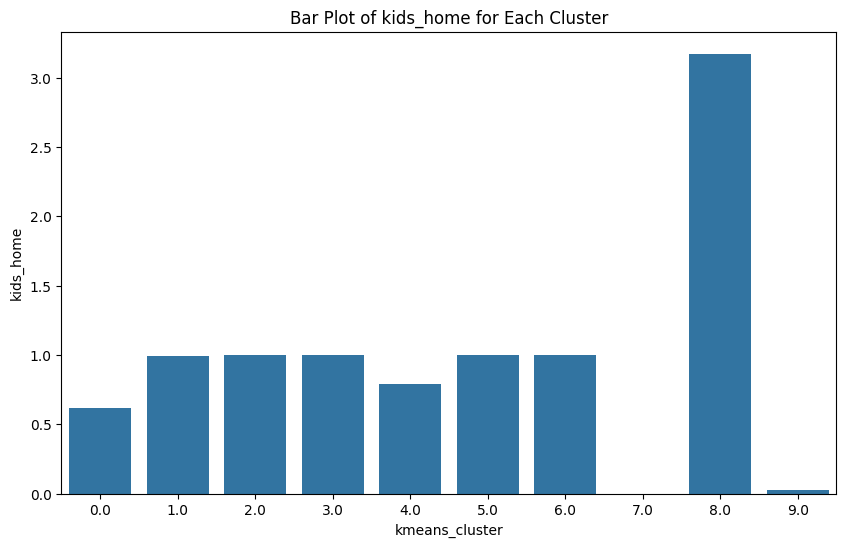

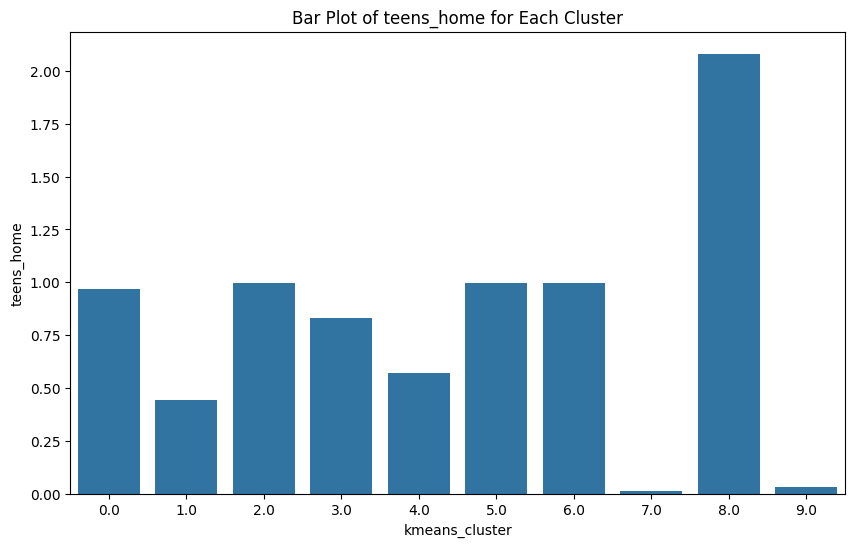

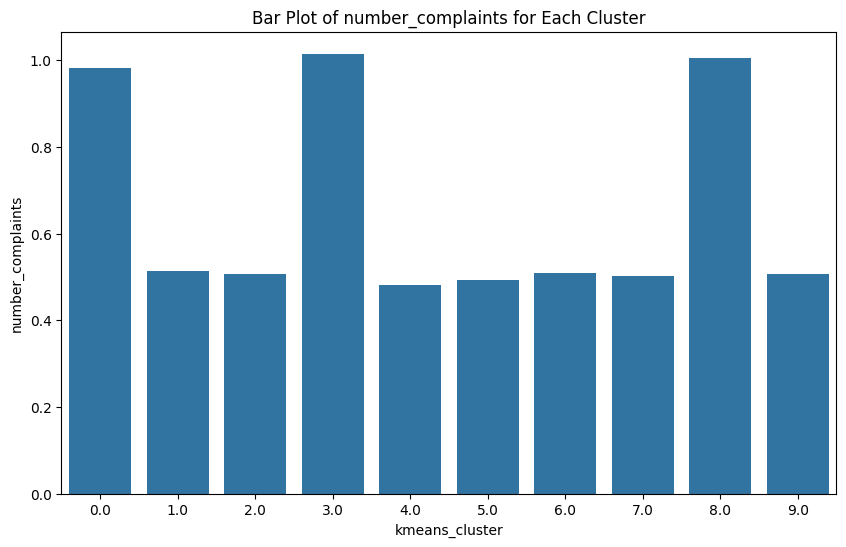

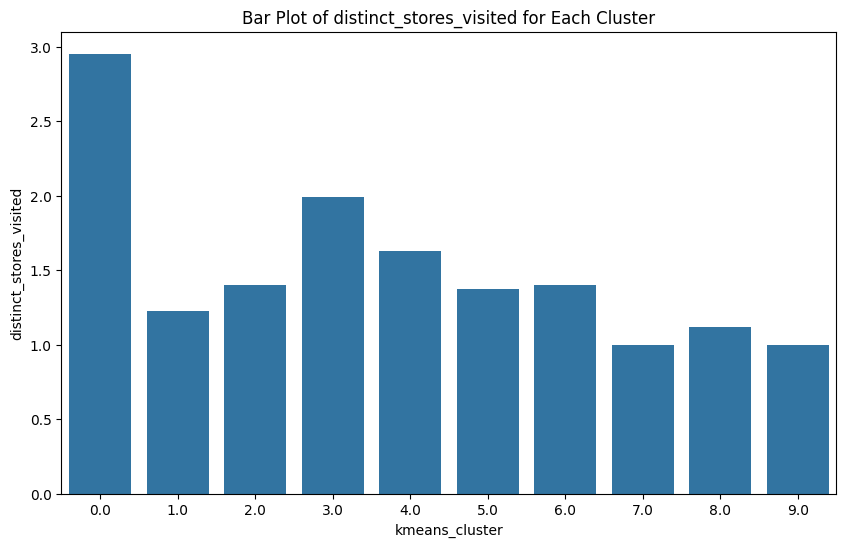

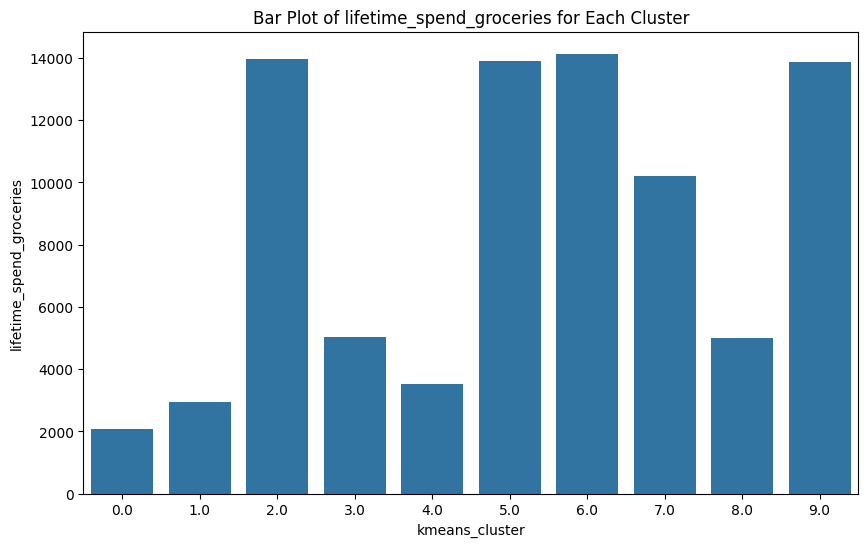

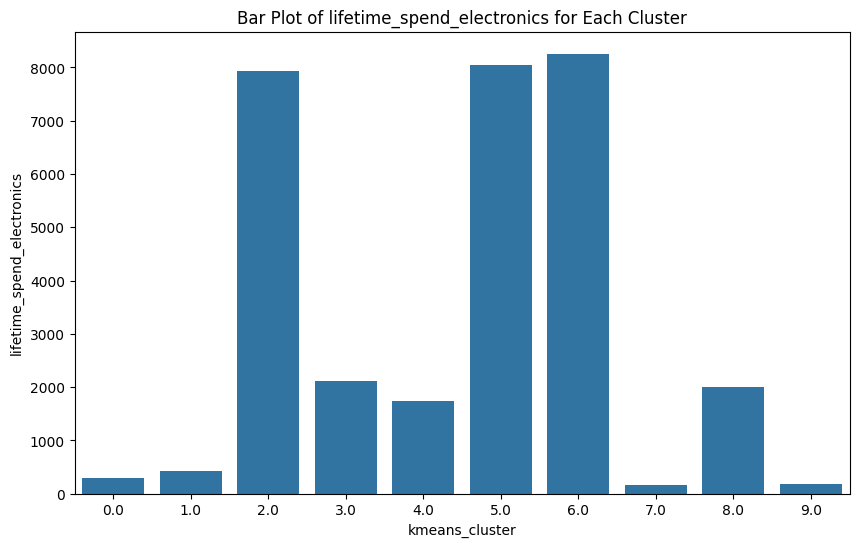

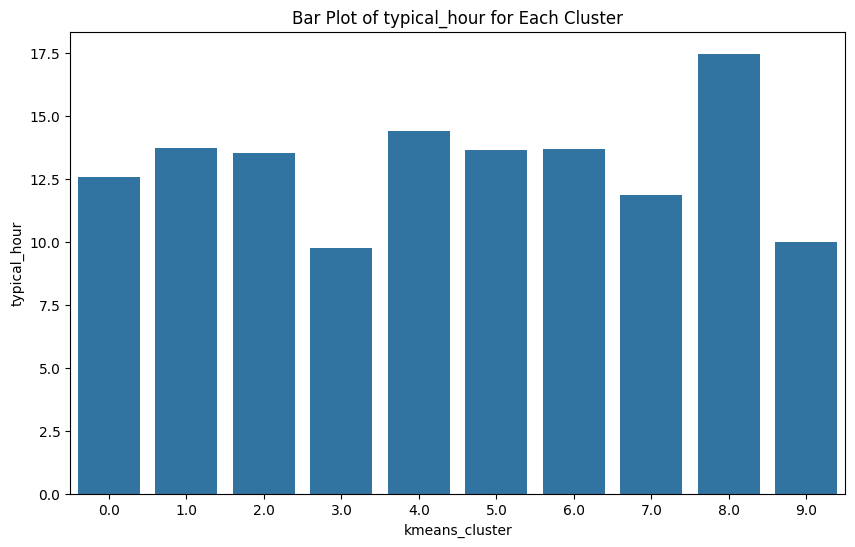

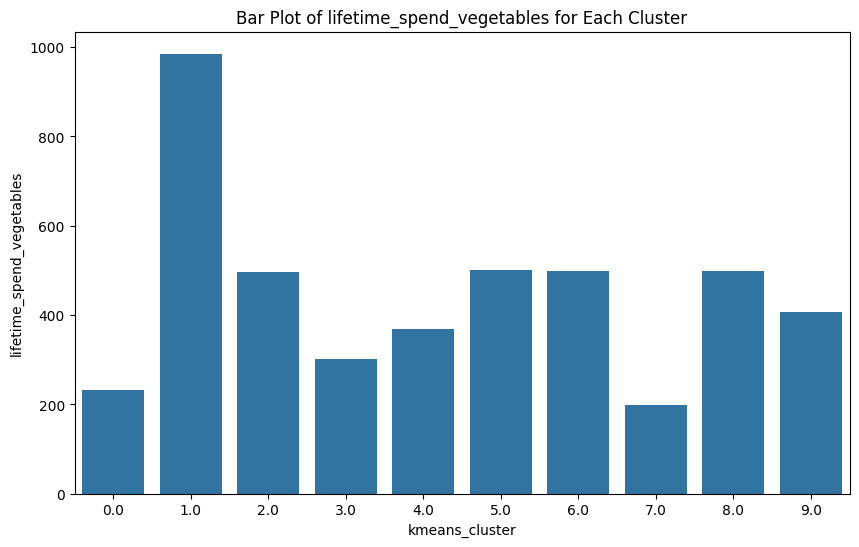

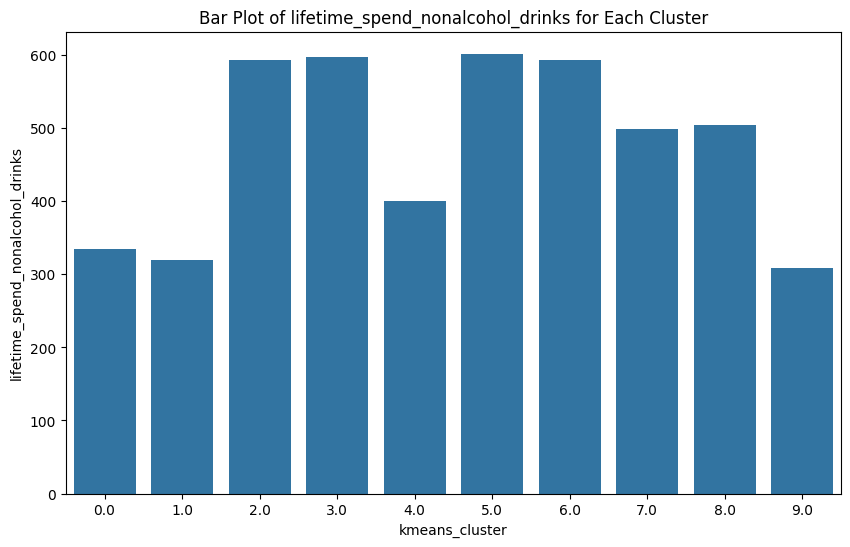

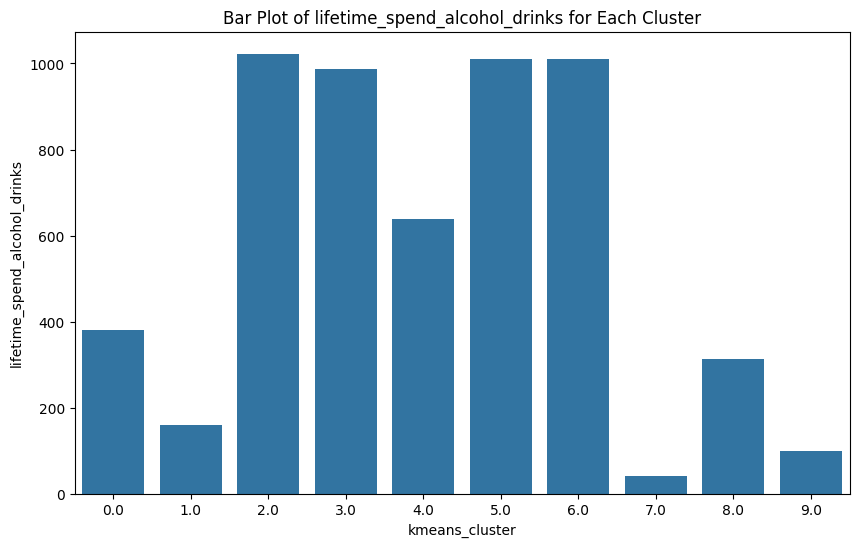

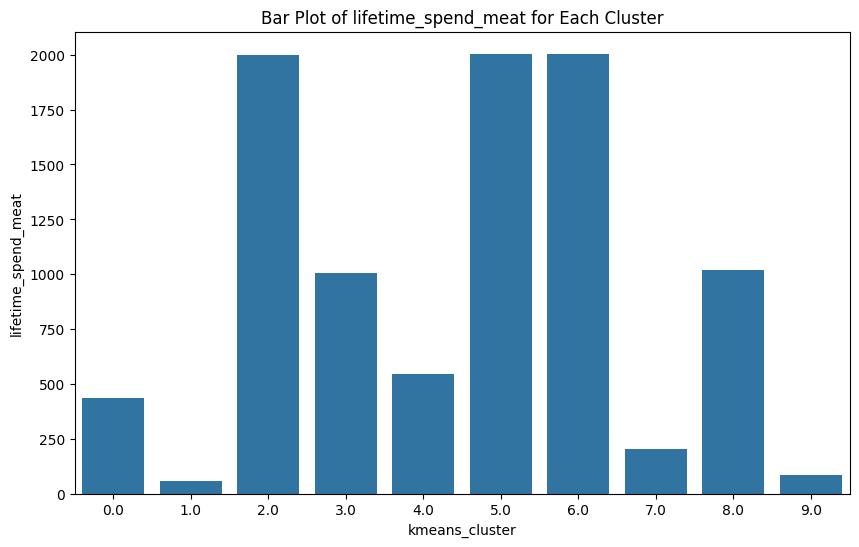

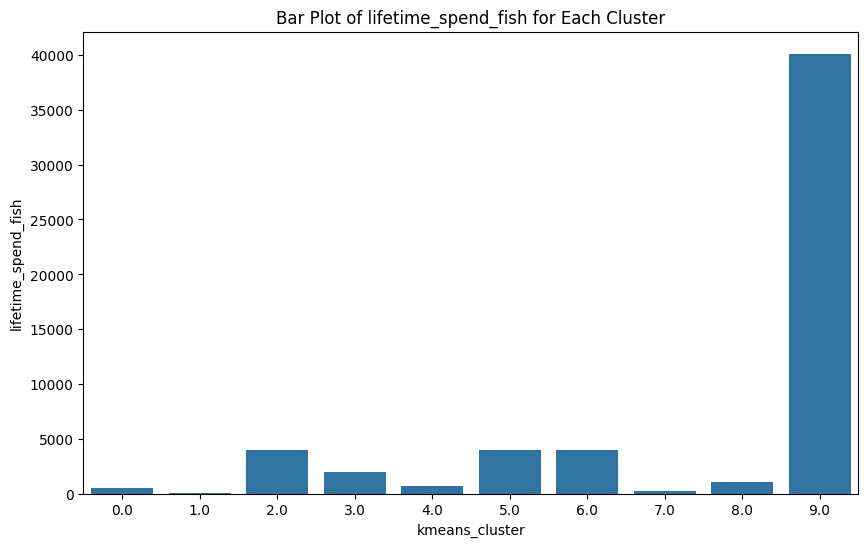

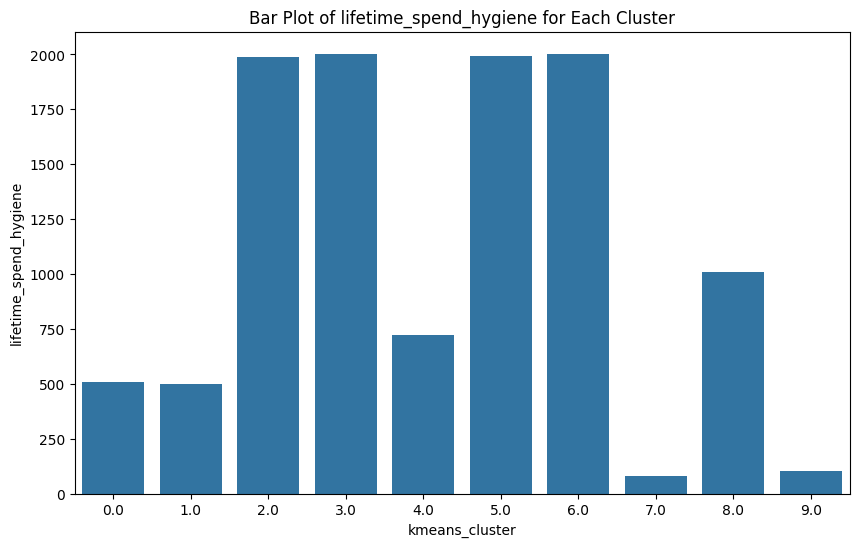

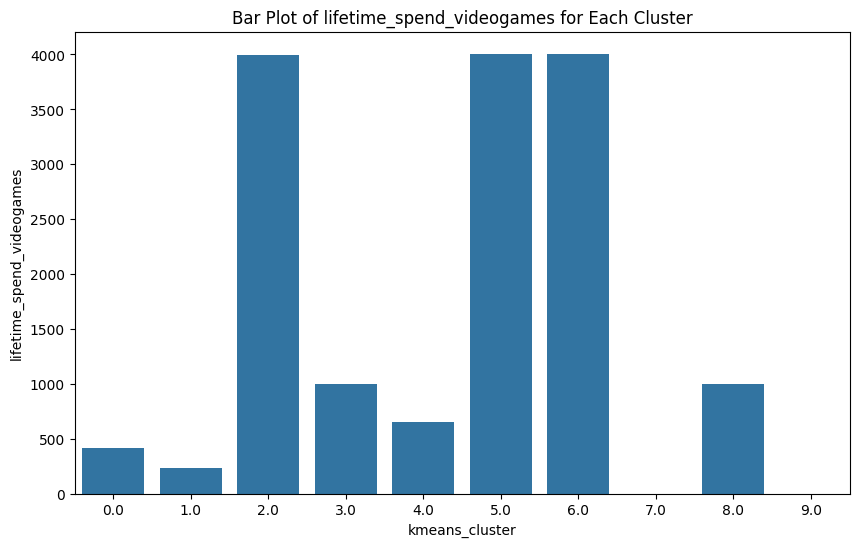

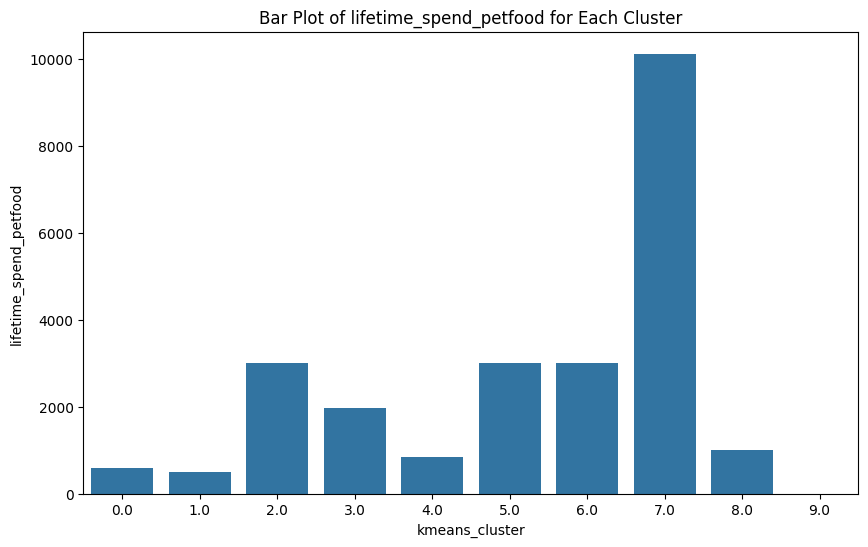

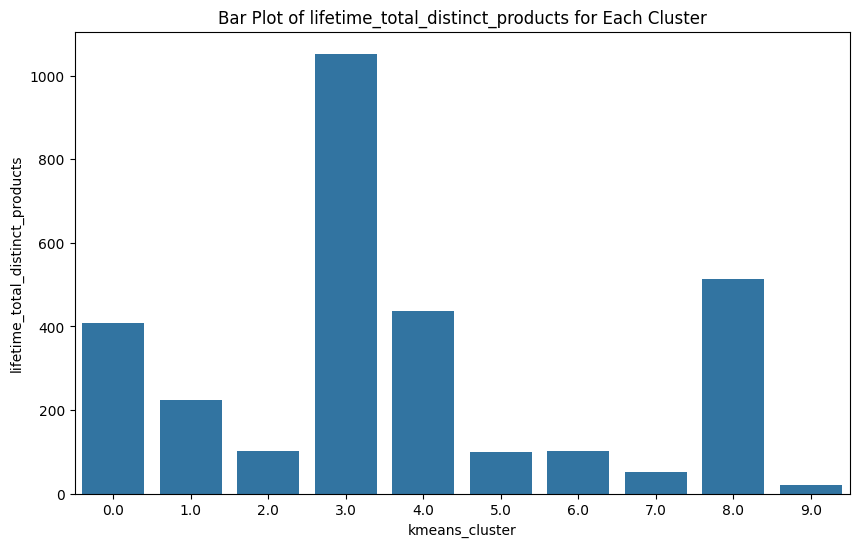

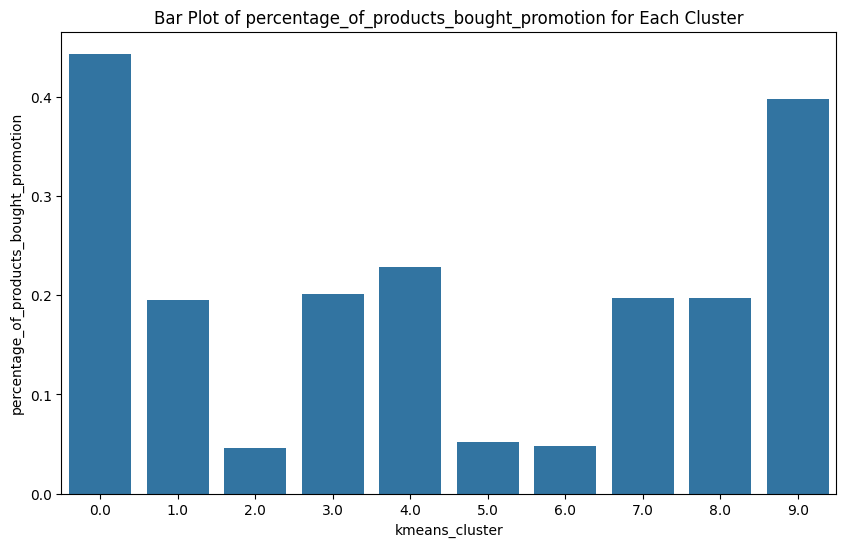

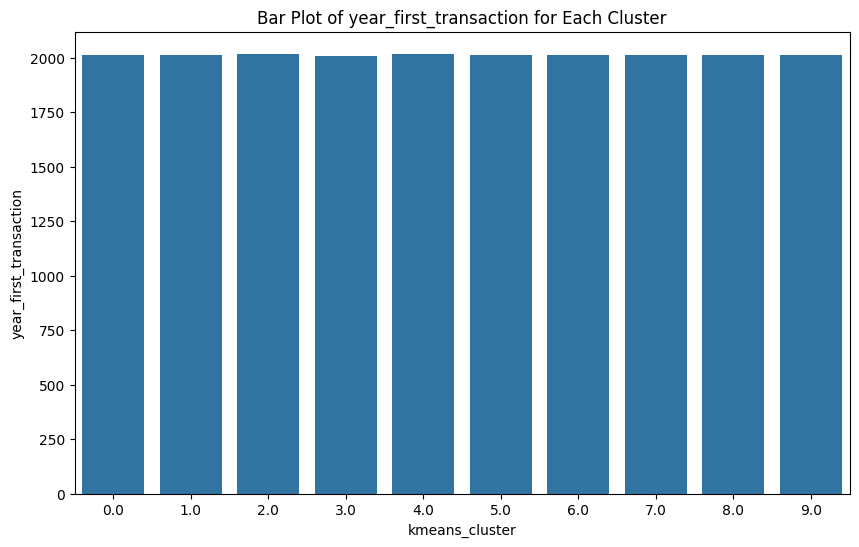

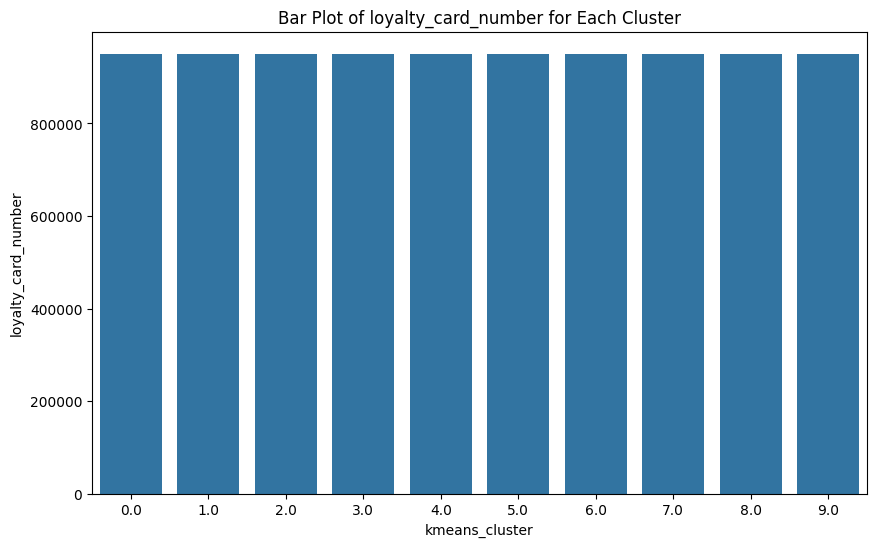

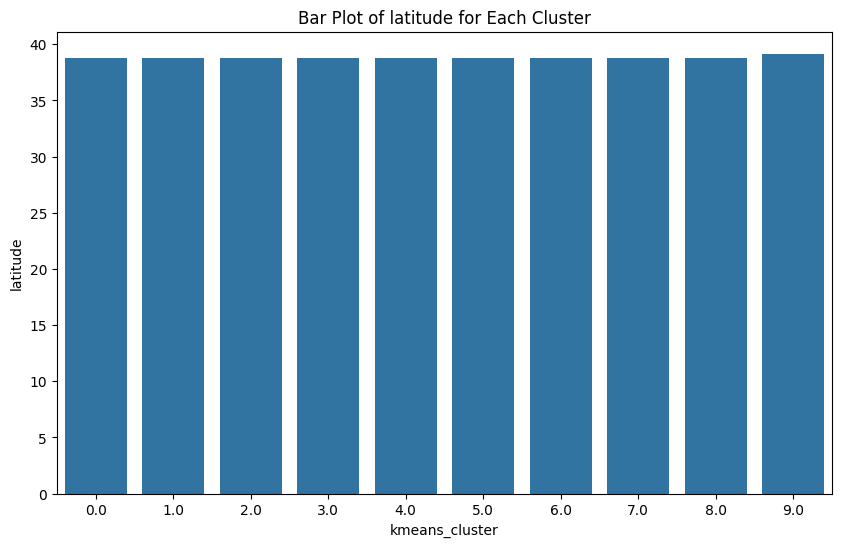

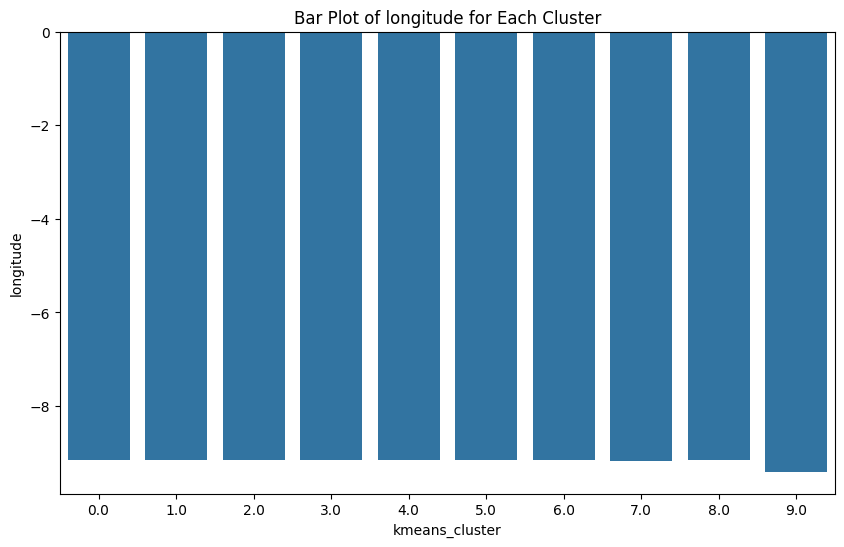

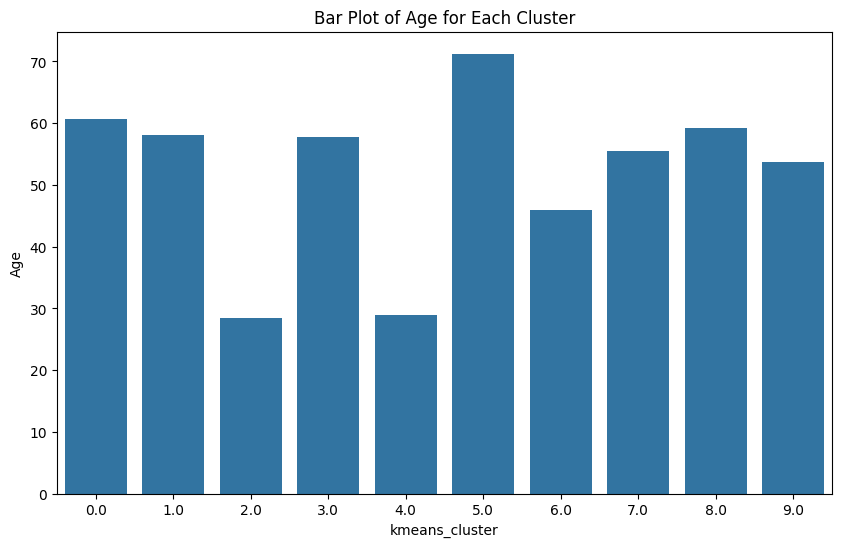

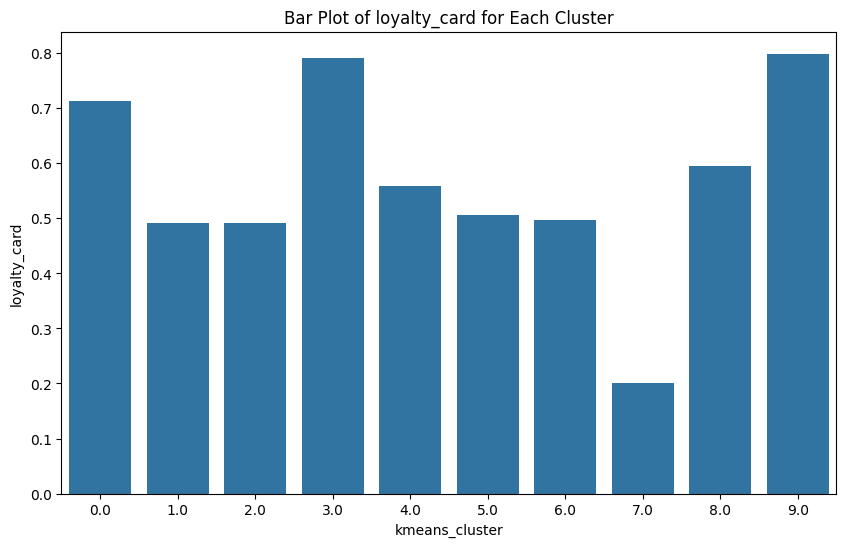

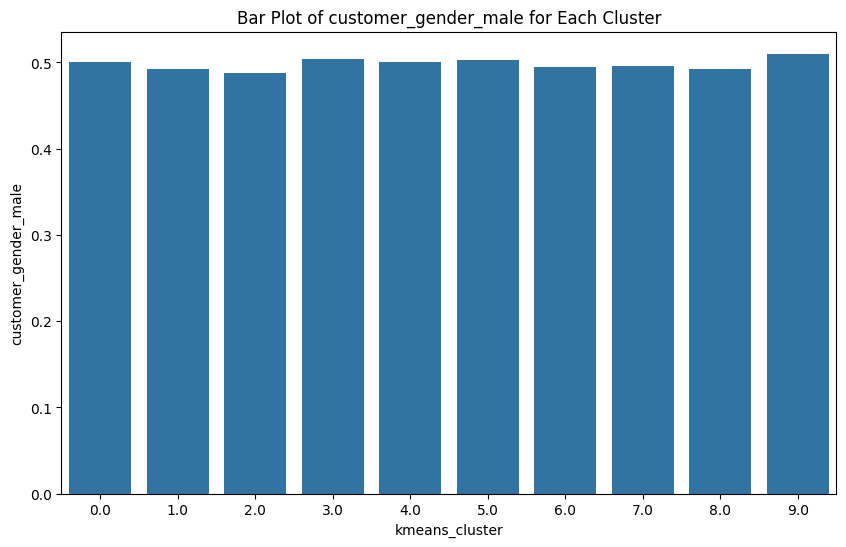

In [59]:
# Bar plots for each variable
for column in mean_clusters.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=mean_clusters.index, y=column, data=mean_clusters)
        plt.title(f'Bar Plot of {column} for Each Cluster')
        plt.show()

## Radar plots with scalled variables only

In [60]:
og_cluster2 = og_cluster.drop(columns = ["customer_name", "loyalty_card", "loyalty_card_number","customer_birthdate", "customer_gender_male", "typical_hour"])
clusters_mm = mm.transform(og_cluster2.iloc[:,:-1])
clusters_scalled = pd.DataFrame(clusters_mm, columns = og_cluster2.iloc[:,:-1].columns, index = og_cluster2.iloc[:,:-1].index)
clusters_scalled["kmeans_cluster"] = og_cluster2["kmeans_cluster"]

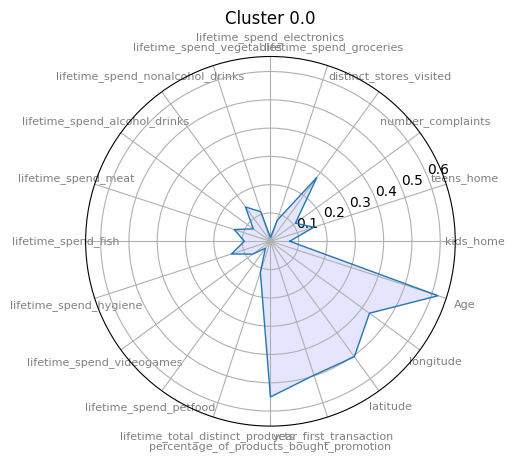

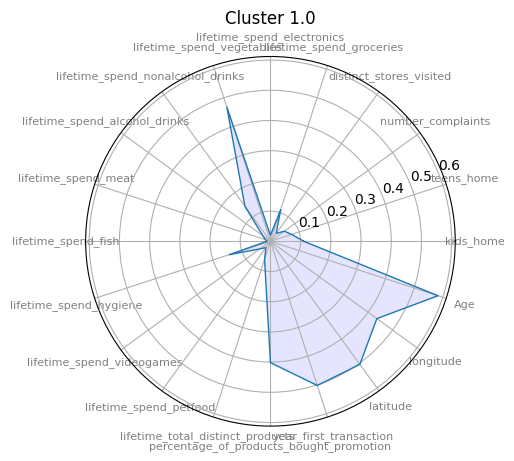

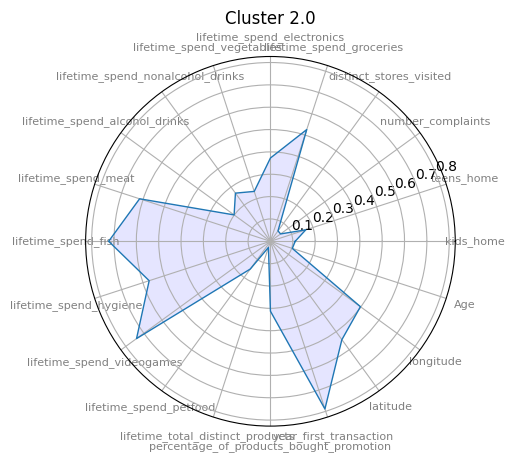

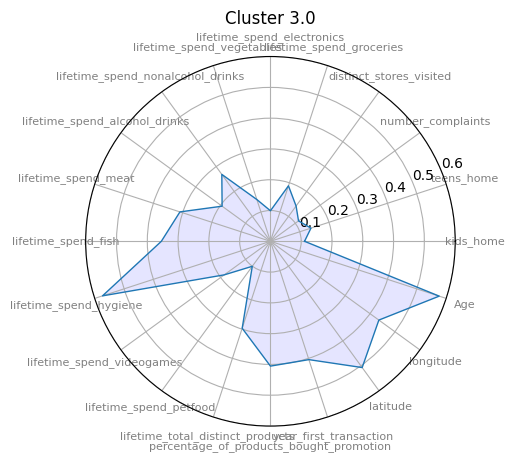

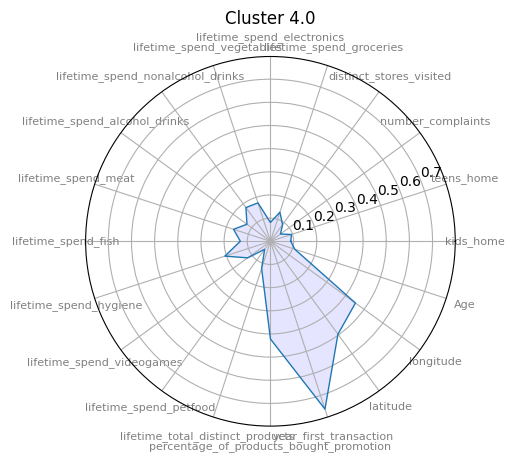

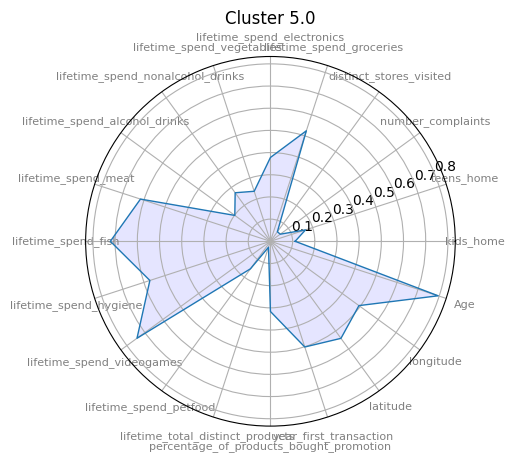

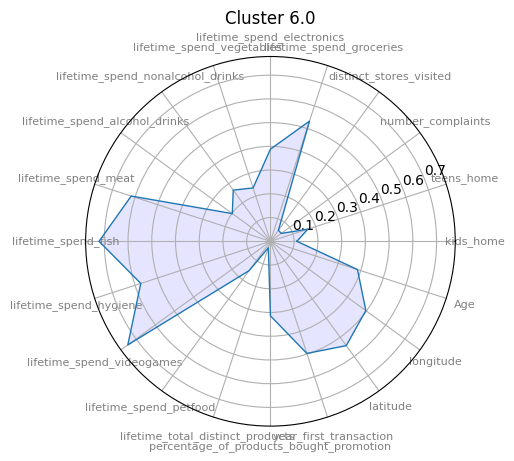

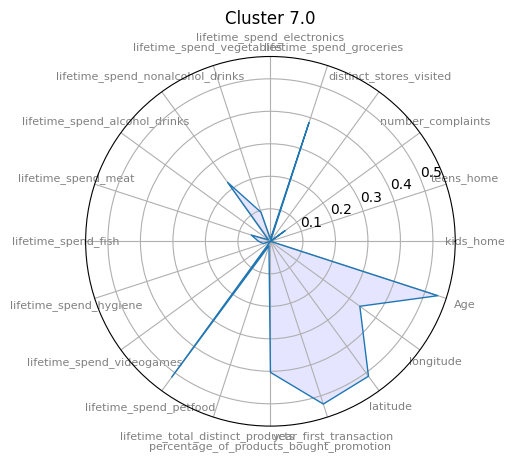

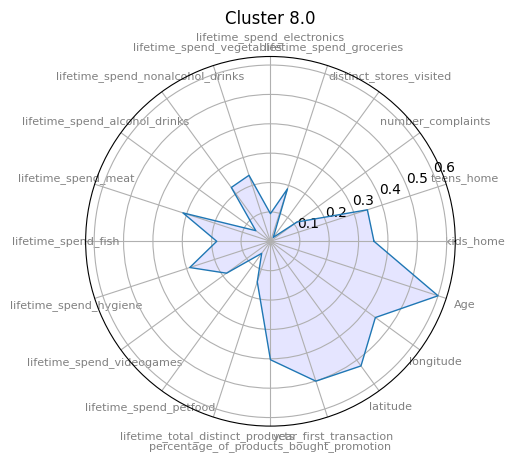

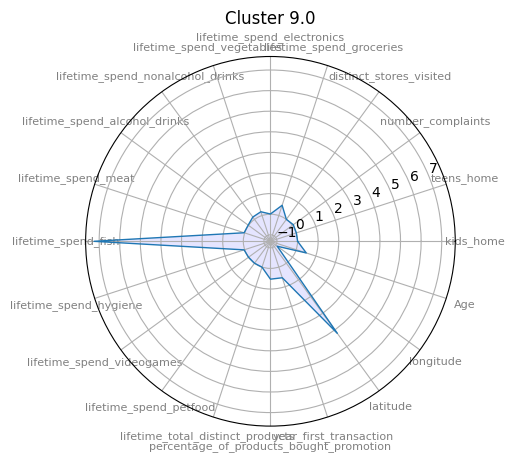

In [61]:
mean_standard_clusters = clusters_scalled.groupby("kmeans_cluster").mean()

# Select the columns to be visualized
categories = mean_standard_clusters.columns.tolist()

# Create a radar chart for each cluster
for cluster in mean_standard_clusters.index.tolist():
    create_radar_chart(mean_standard_clusters, cluster, categories)


In [62]:
mean_clusters

kids_home  teens_home  number_complaints  \
kmeans_cluster                                             
0.0              0.615073    0.966234           0.982295   
1.0              0.992609    0.442943           0.512594   
2.0              0.997522    0.997497           0.506219   
3.0              0.997528    0.830412           1.015360   
4.0              0.791529    0.571057           0.480807   
5.0              1.002444    0.997103           0.492031   
6.0              1.002587    0.994778           0.508445   
7.0              0.000000    0.011970           0.502602   
8.0              3.172580    2.081939           1.006041   
9.0              0.023560    0.031250           0.506562   

                distinct_stores_visited  lifetime_spend_groceries  \
kmeans_cluster                                                      
0.0                            2.953721               2085.978913   
1.0                            1.227036               2940.065937   
2.0                            1.402778              13960.280982   
3.0                            1.992198               5033.208806   
4.0                            1.625436               3508.366562   
5.0                            1.372980              13910.594845   
6.0                            1.400000              14135.890452   
7.0                            1.000000              10205.218674   
8.0                            1.116447               4986.583390   
9.0                            1.000000              13854.639175   

                lifetime_spend_electronics  typical_hour  \
kmeans_cluster                                             
0.0                             287.110737     12.561293   
1.0                             417.120932     13.723510   
2.0                            7928.802454     13.533163   
3.0                            2110.731599      9.741503   
4.0                            1728.755504     14.398562   
5.0                            8040.200161     13.637243   
6.0                            8259.961637     13.682060   
7.0                             159.748903     11.866565   
8.0                            2001.100749     17.483762   
9.0                             187.306701     10.013405   

                lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
kmeans_cluster                                                                
0.0                            231.703430                        334.052005   
1.0                            985.739006                        319.988356   
2.0                            495.776529                        592.577914   
3.0                            301.210086                        597.683122   
4.0                            368.482447                        400.308614   
5.0                            500.794166                        601.737817   
6.0                            499.455221                        592.899829   
7.0                            198.151643                        499.265724   
8.0                            498.880444                        503.880020   
9.0                            405.793194                        308.463918   

                lifetime_spend_alcohol_drinks  ...  lifetime_spend_petfood  \
kmeans_cluster                                 ...                           
0.0                                380.031953  ...              592.007374   
1.0                                160.247194  ...              507.644501   
2.0                               1023.039264  ...             3003.937423   
3.0                                987.855904  ...             1966.771848   
4.0                                637.822526  ...              837.291919   
5.0                               1010.882400  ...             3003.602497   
6.0                               1011.015345  ...             2995.272805   
7.0                                 40.396636  ...            10126.165285   
8.0             

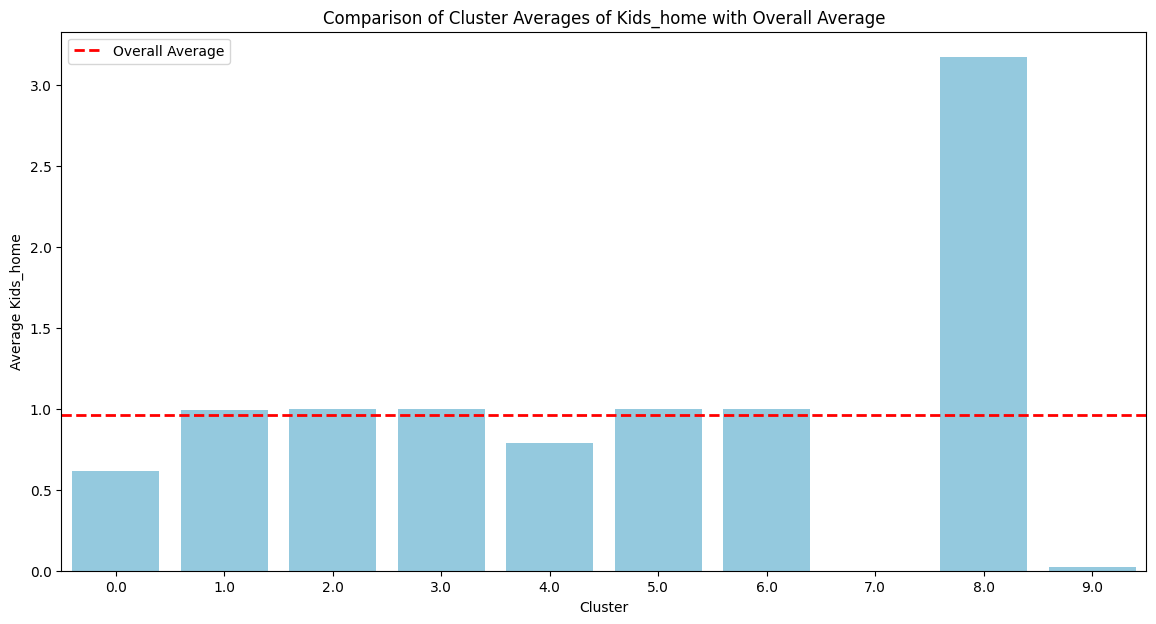

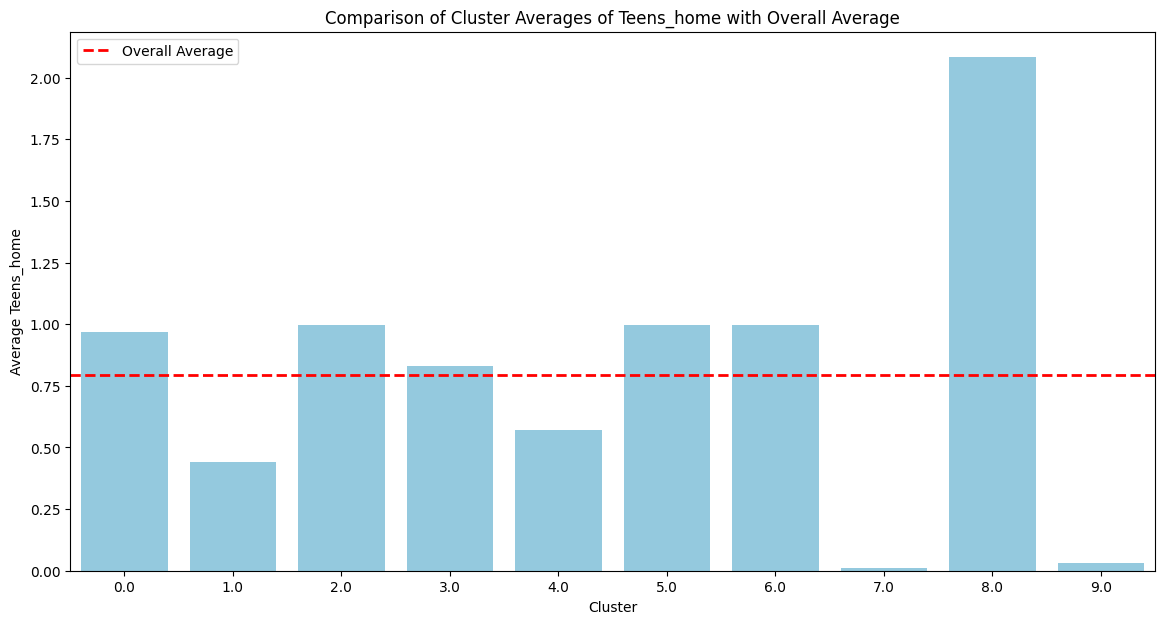

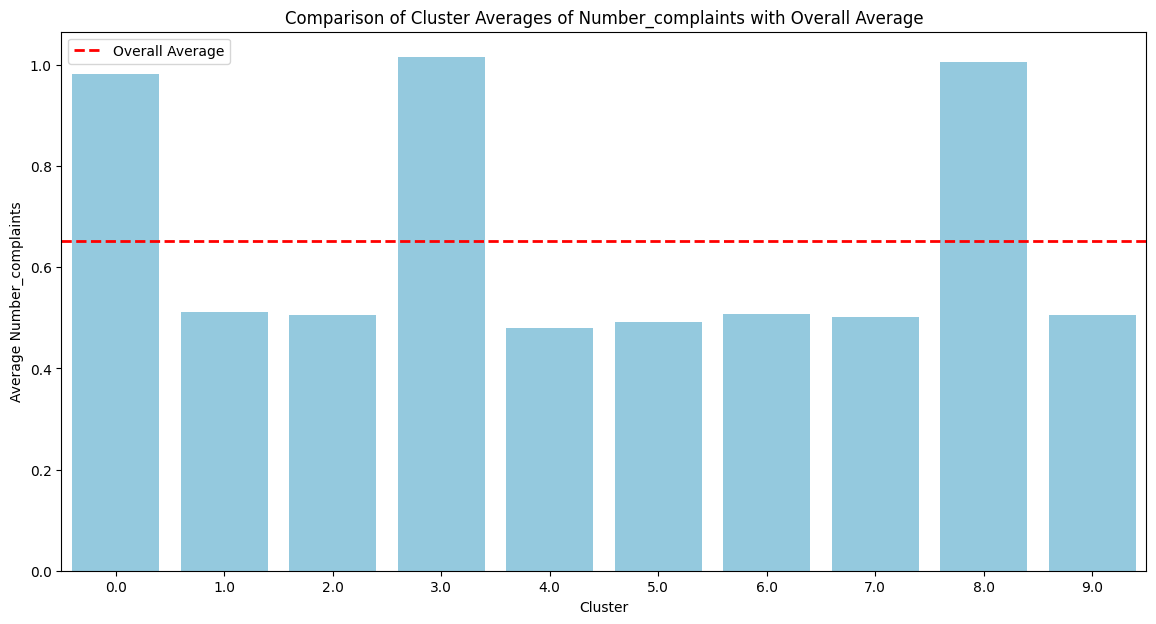

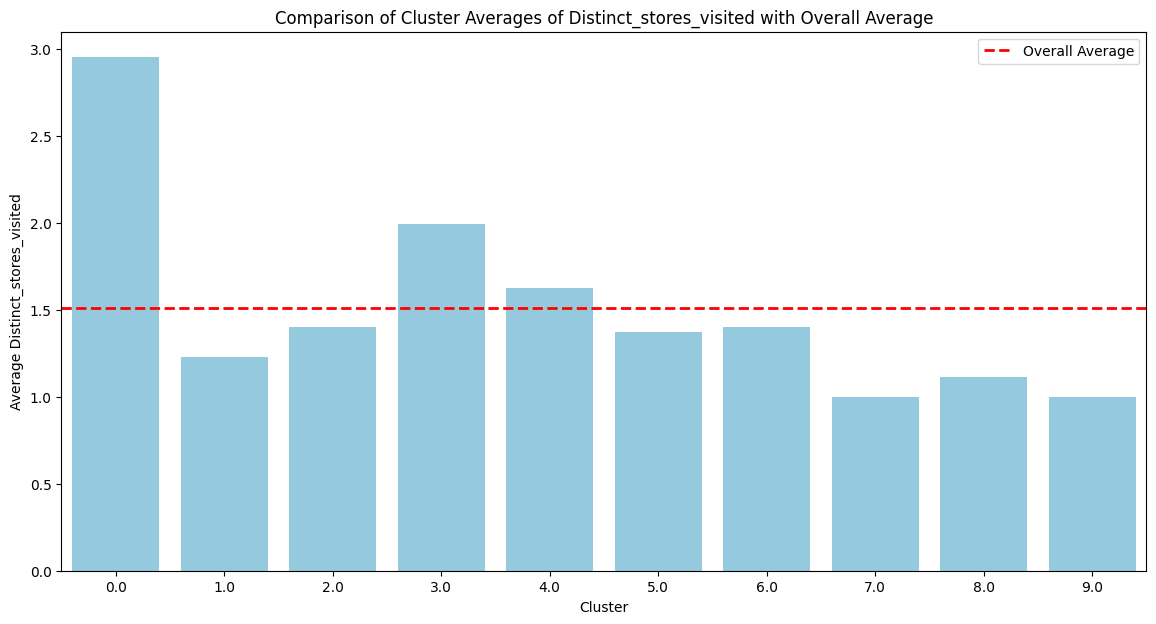

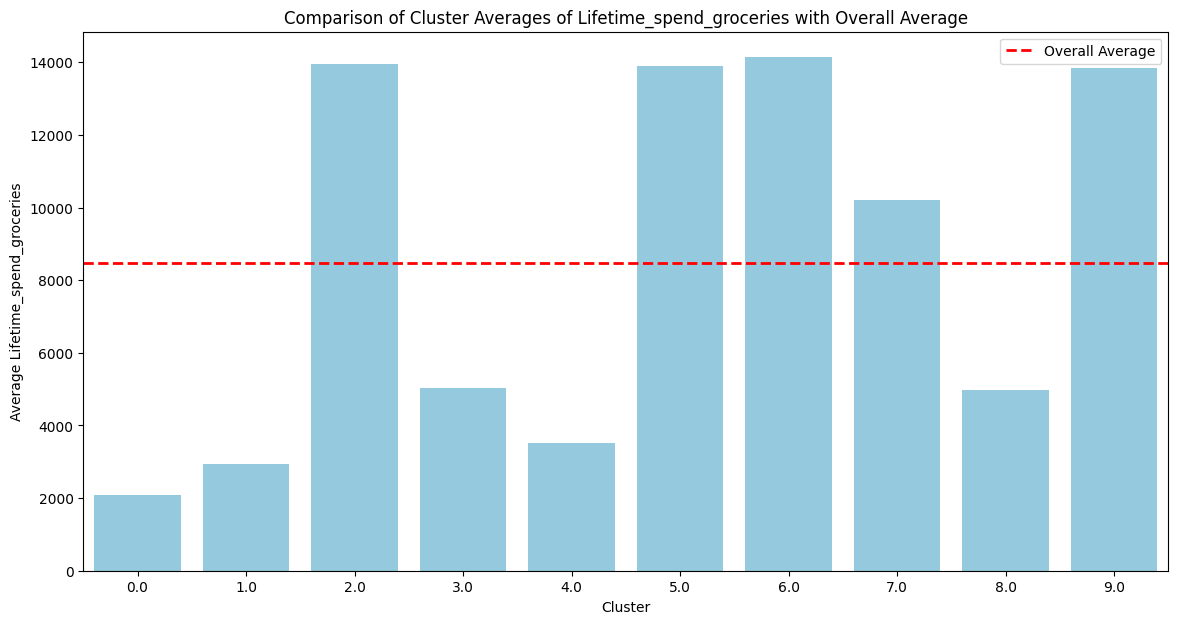

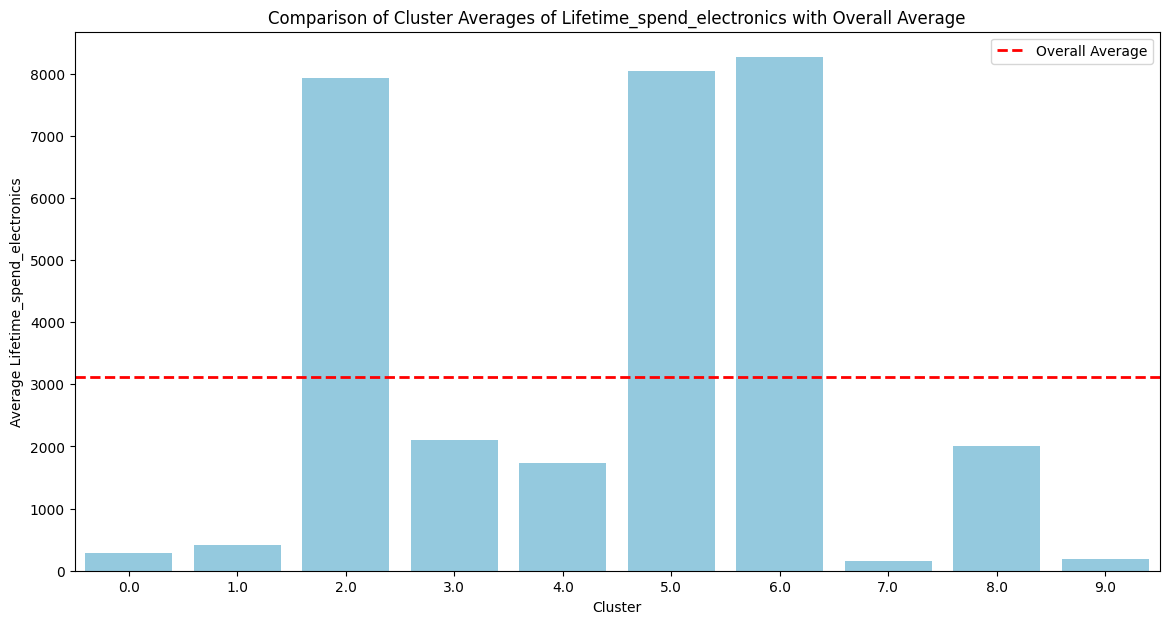

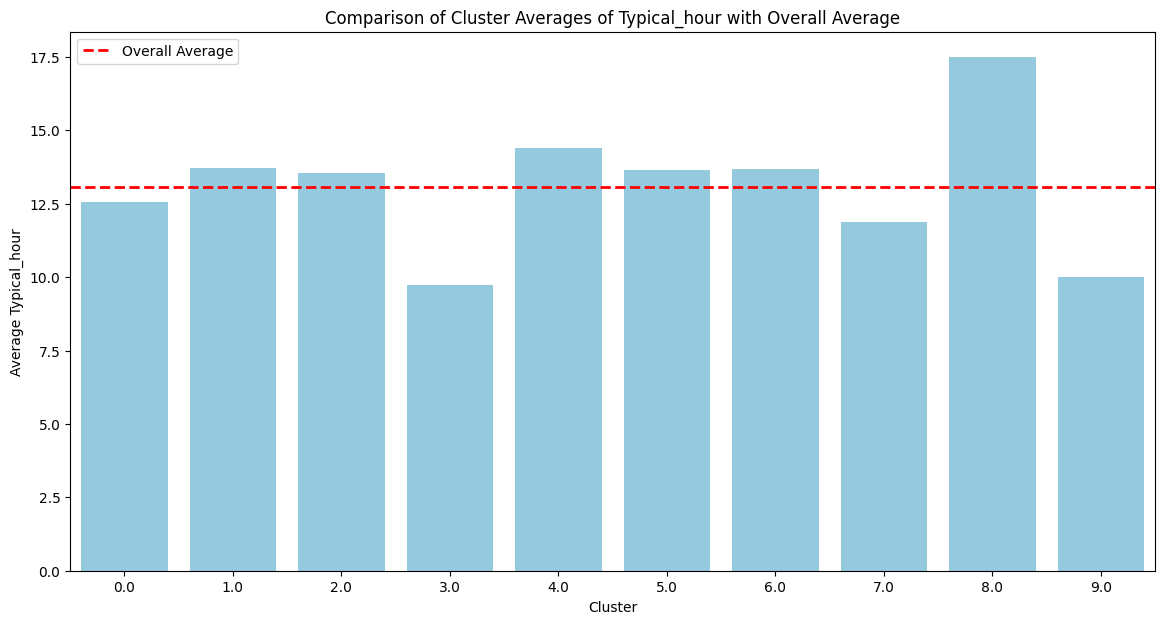

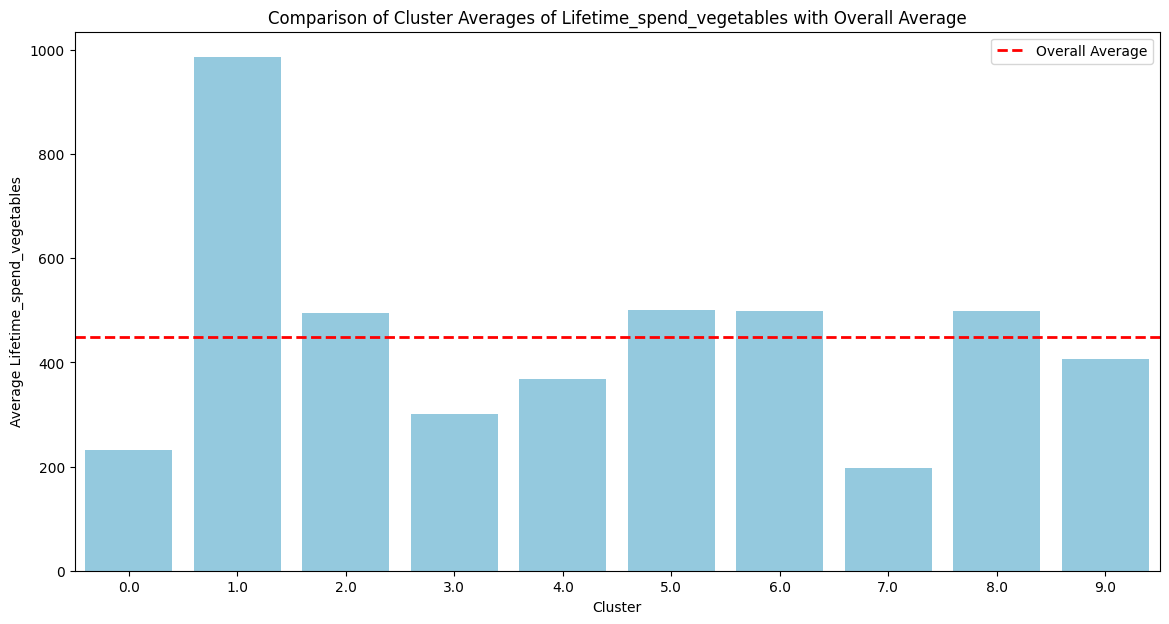

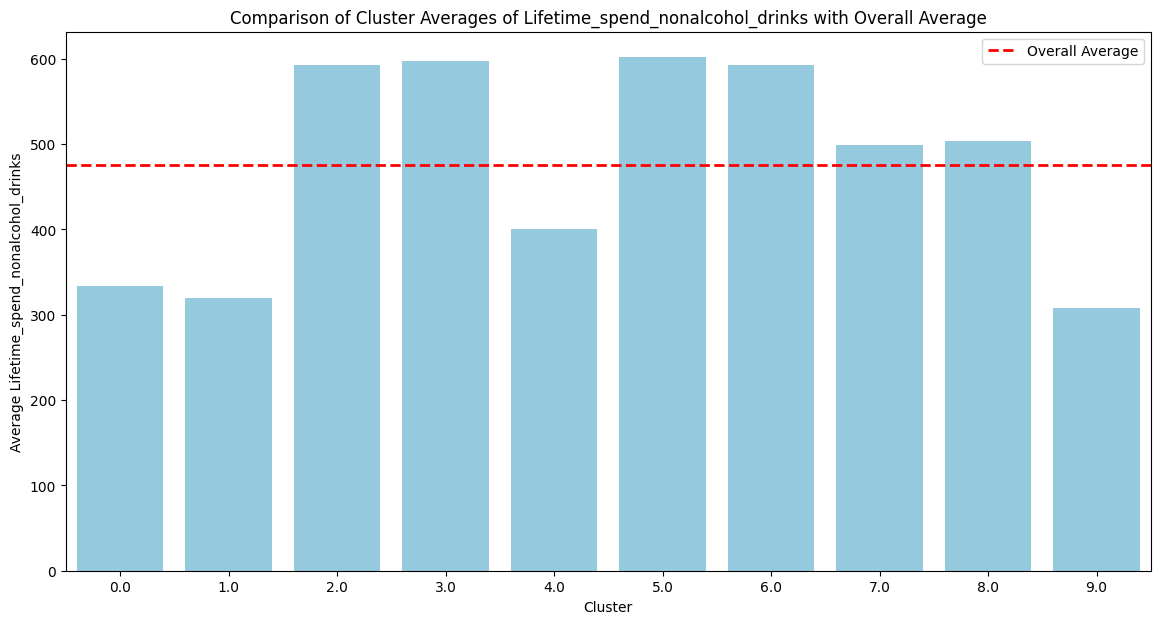

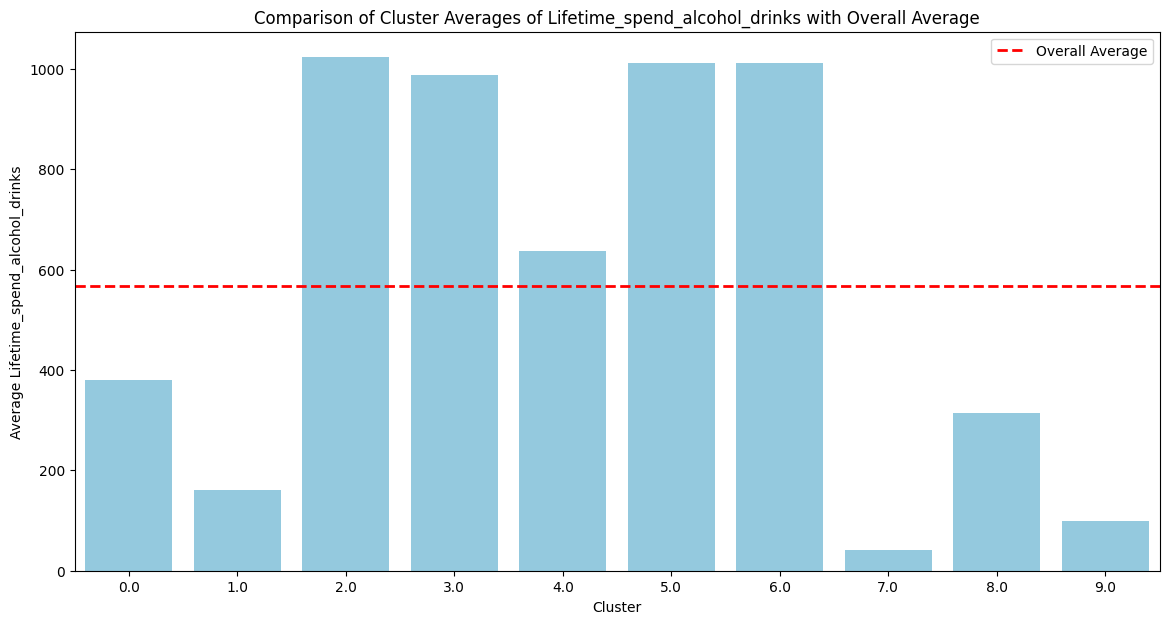

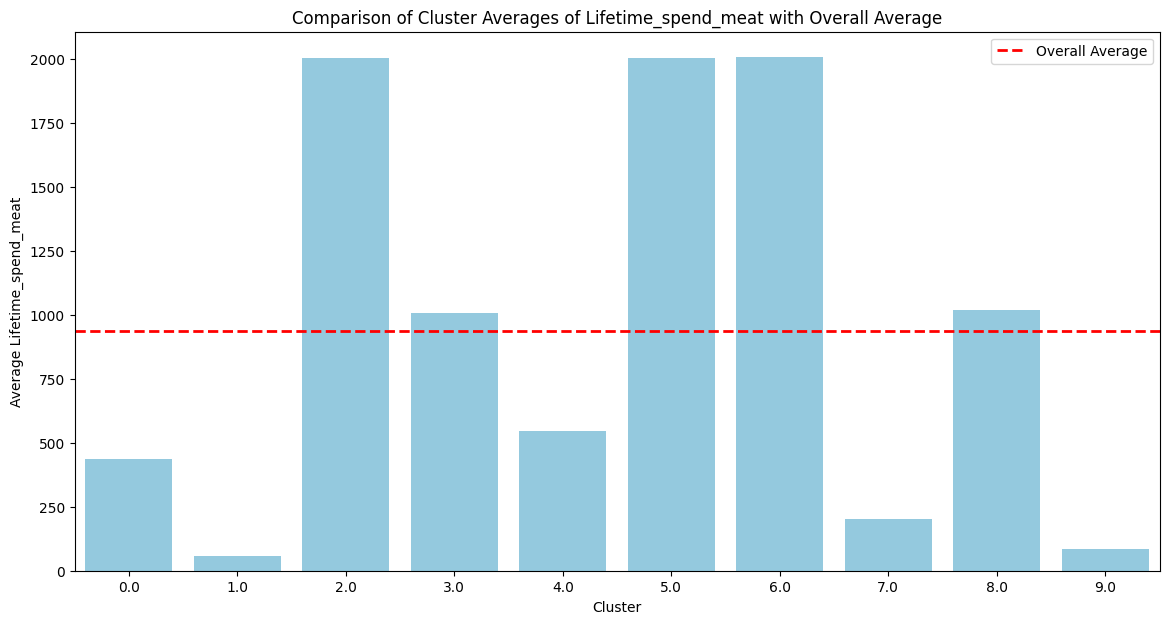

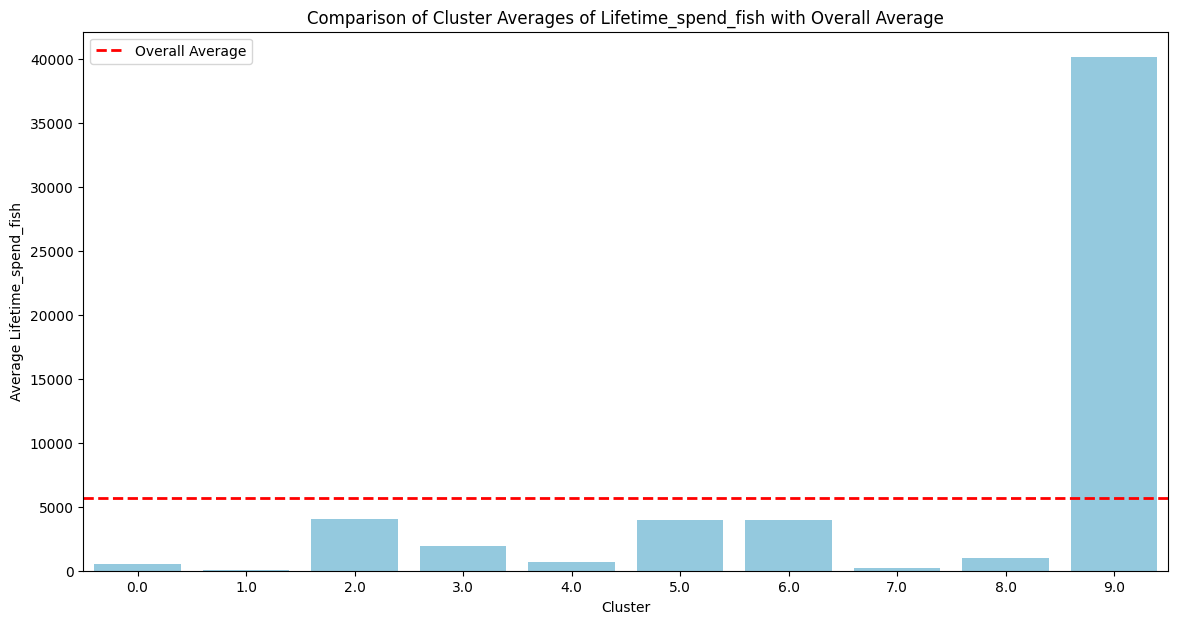

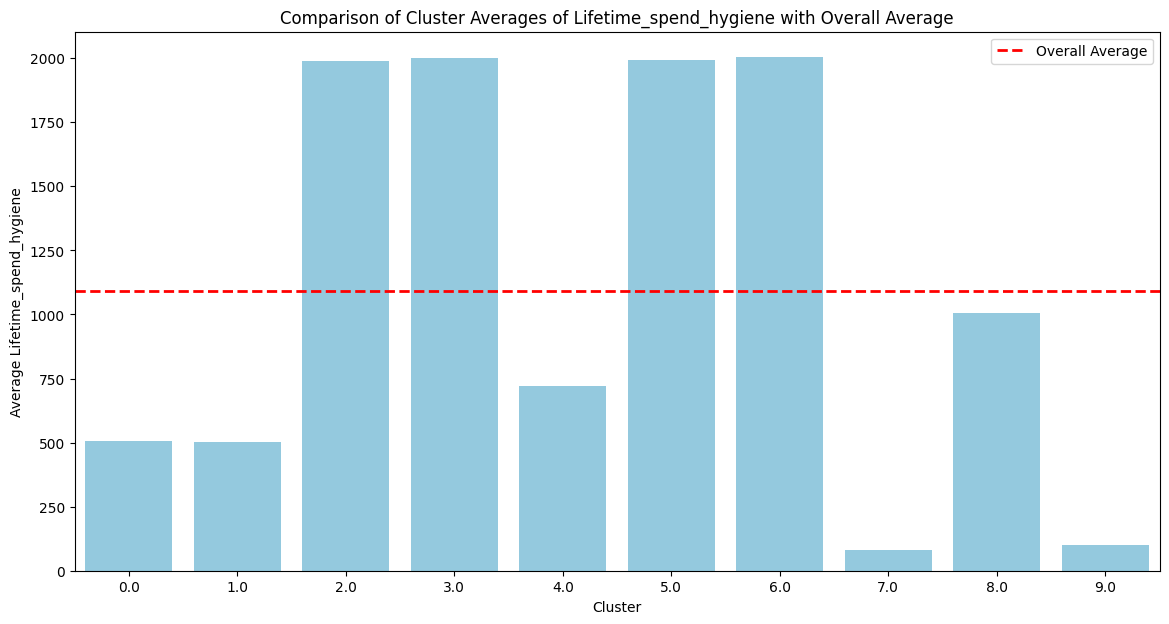

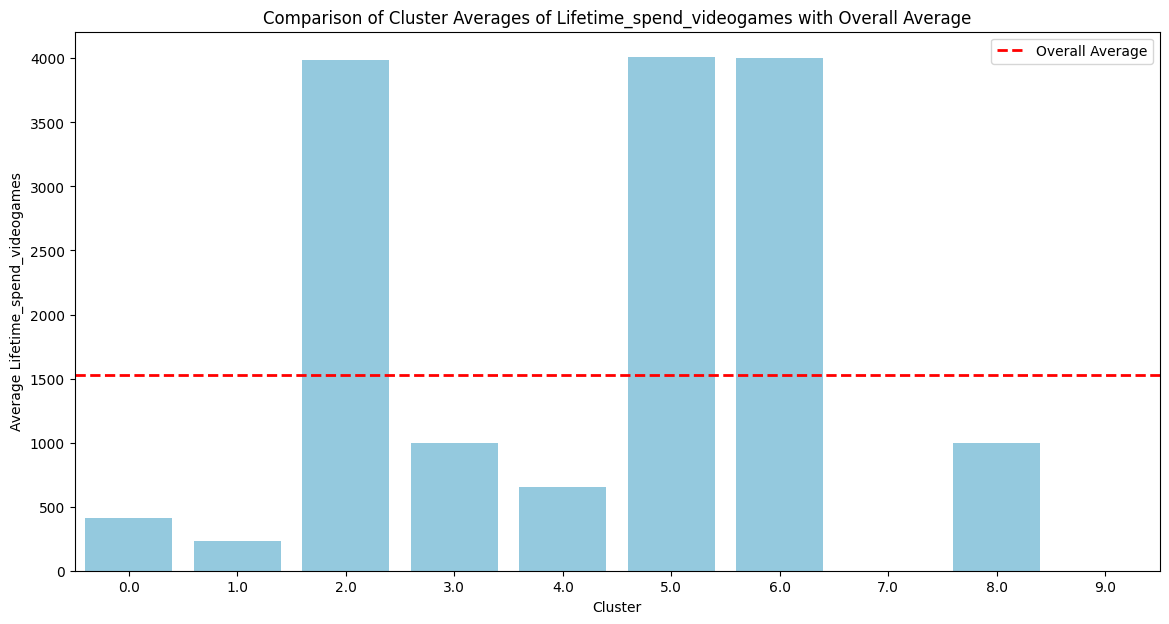

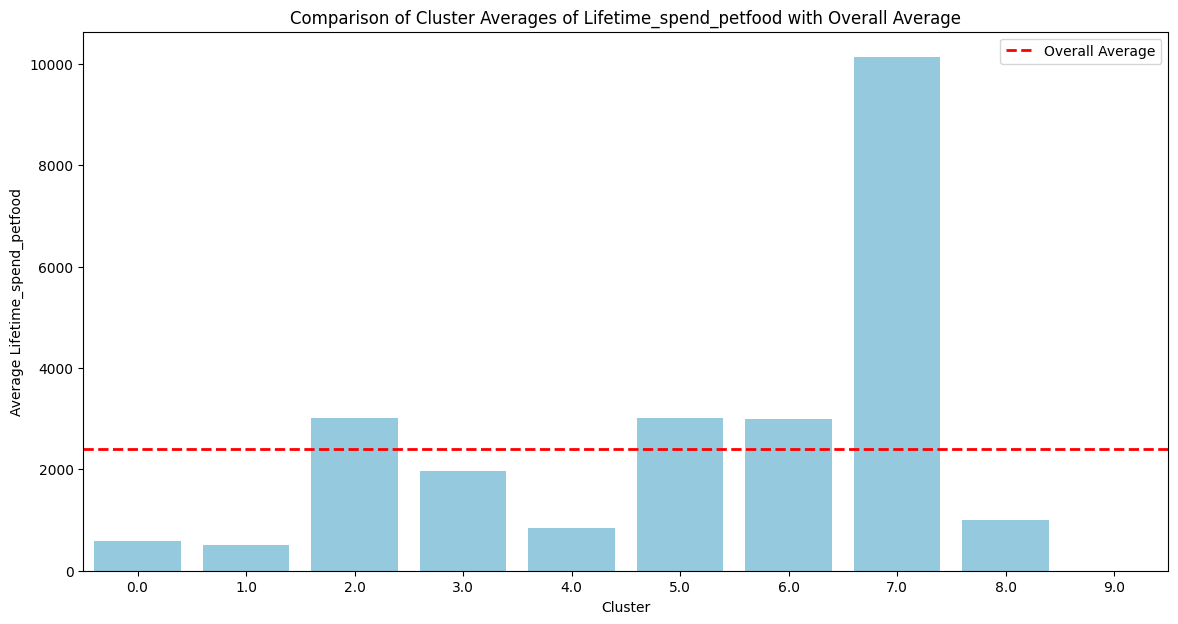

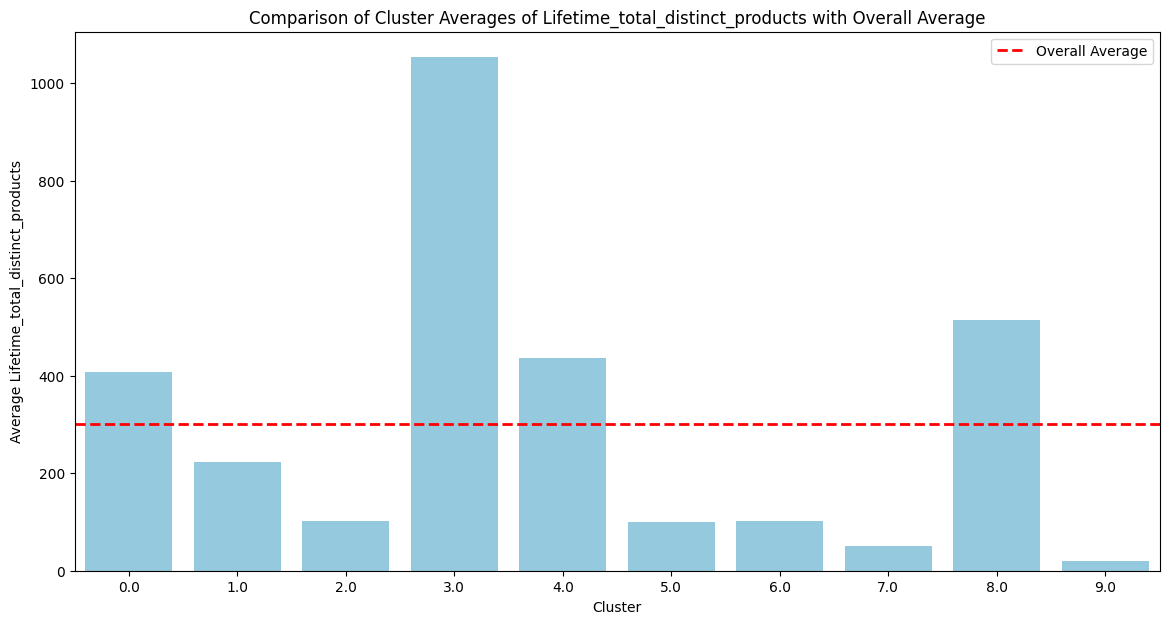

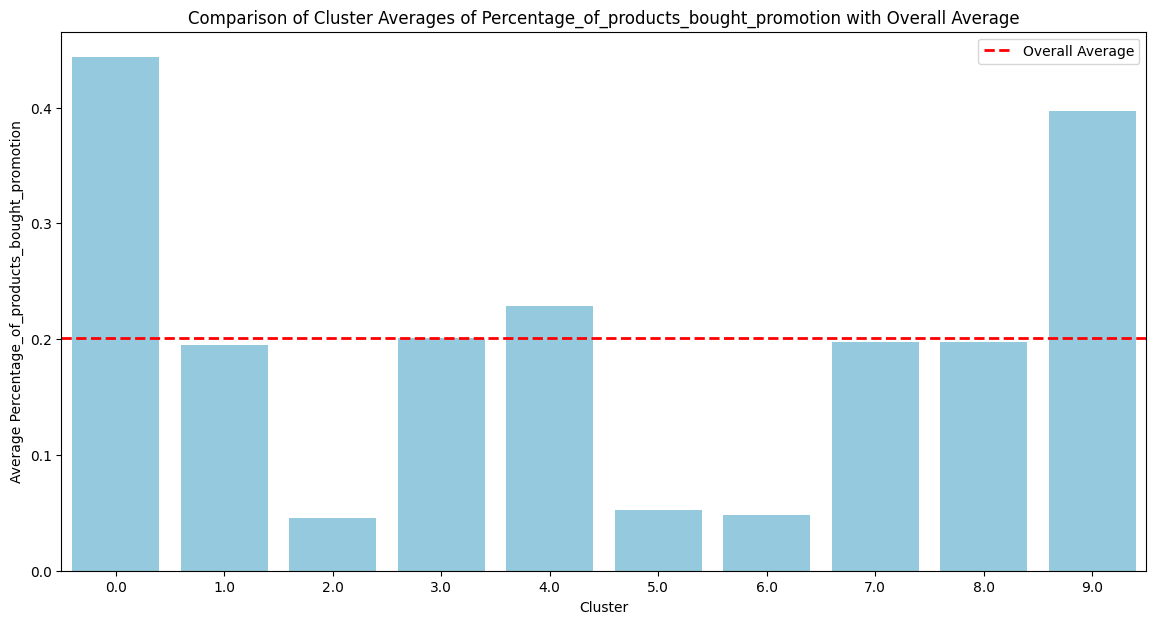

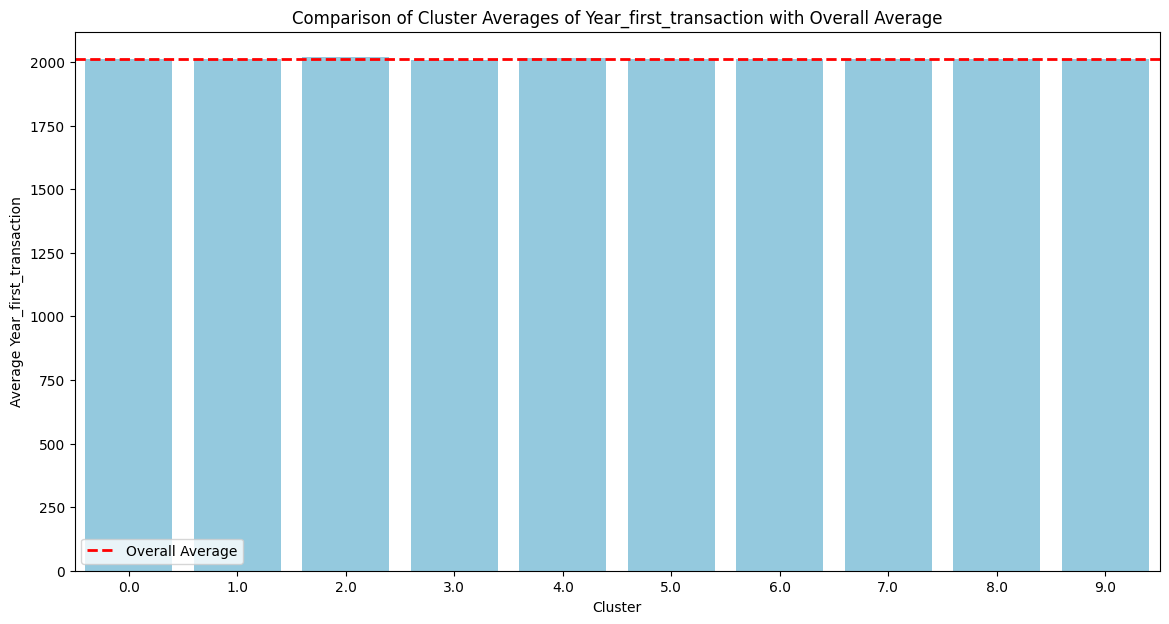

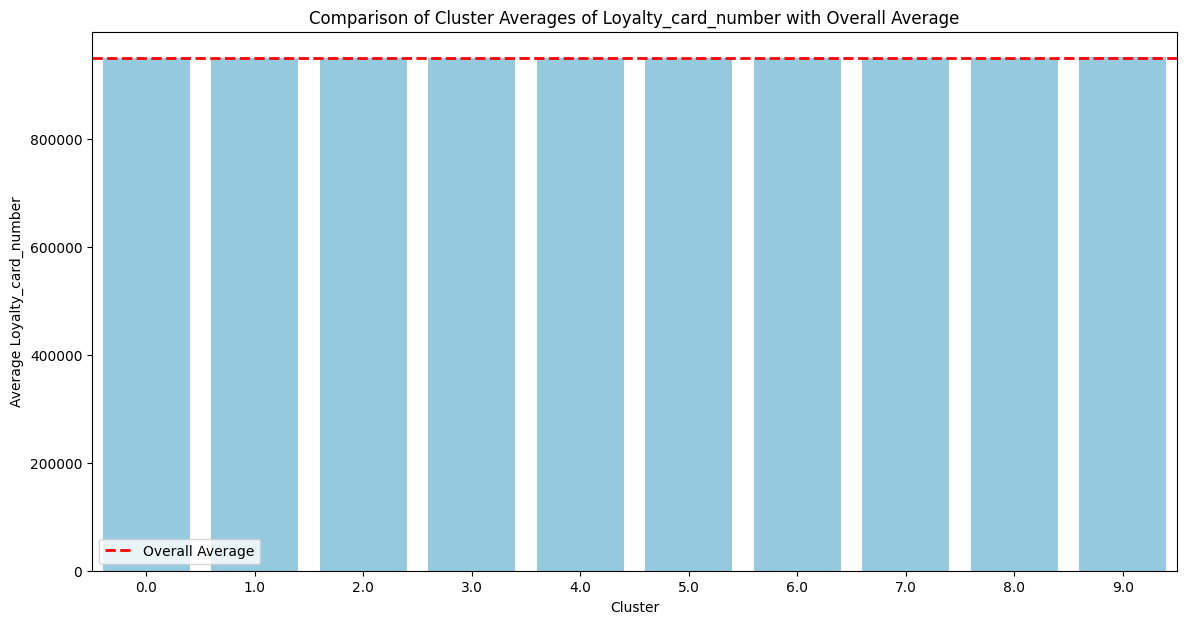

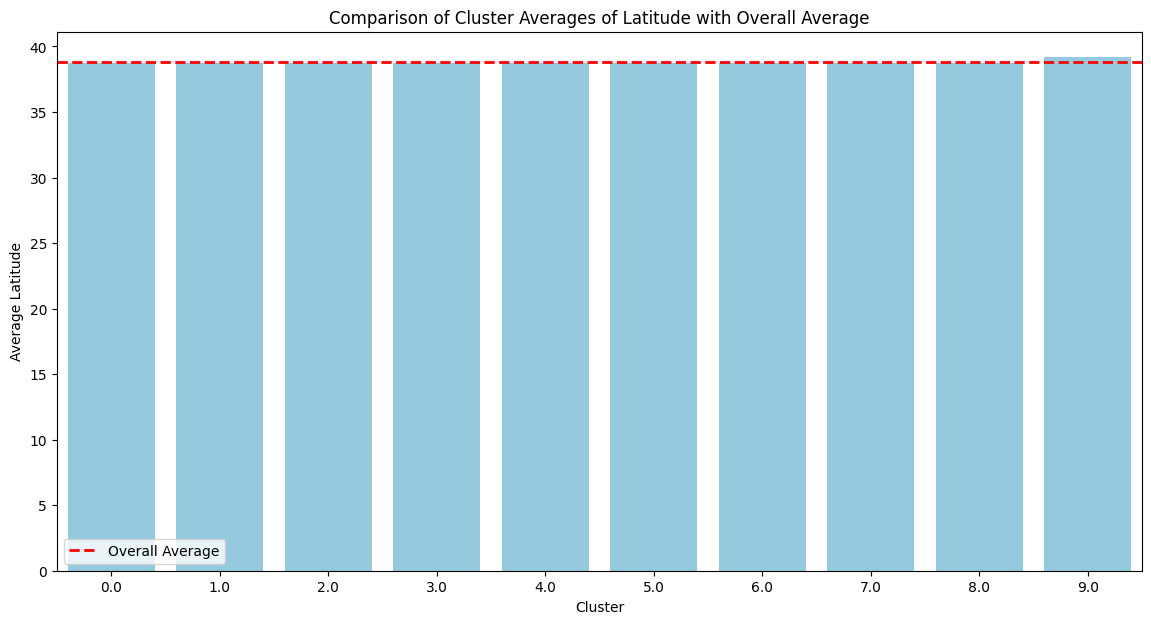

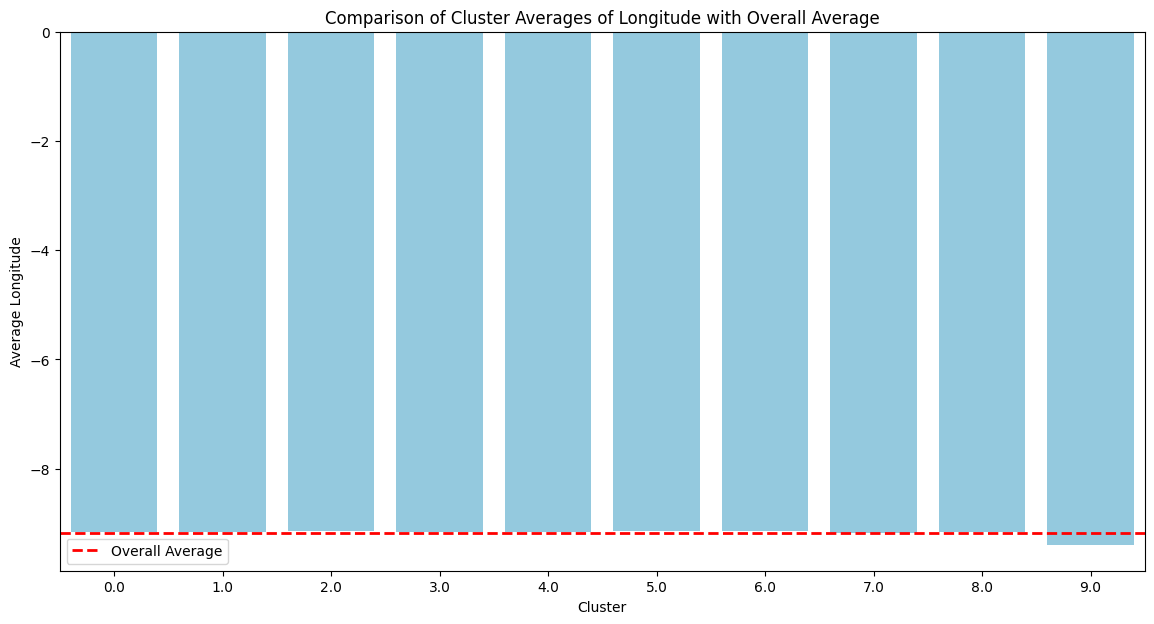

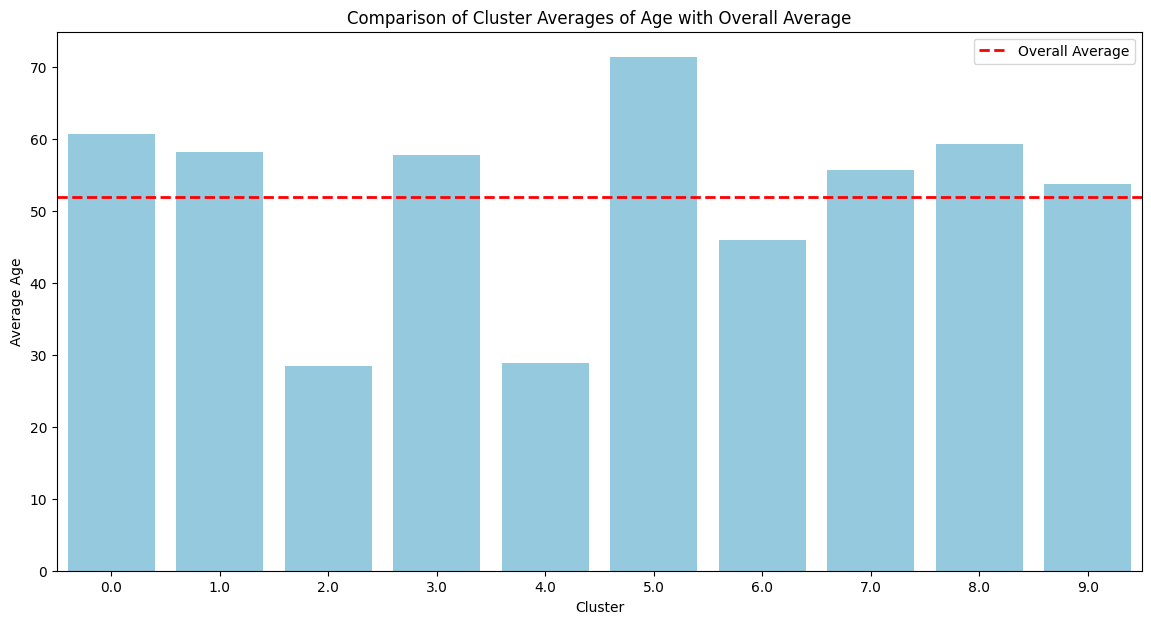

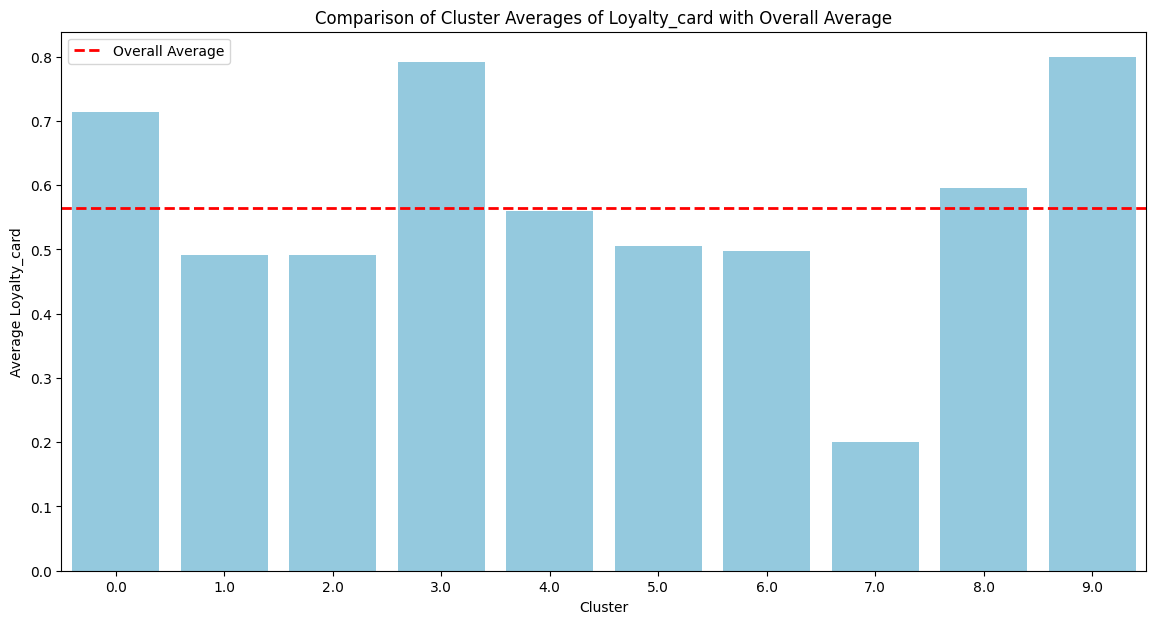

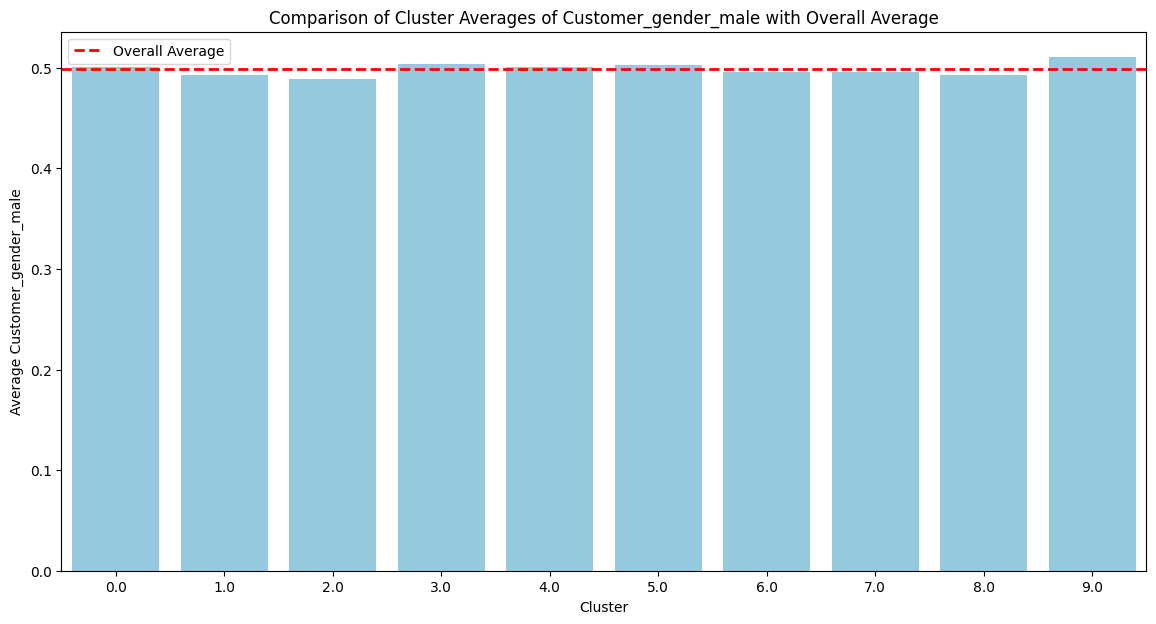

In [63]:
for feature_to_compare in mean_clusters.columns:
    overall_avg = mean_clusters[feature_to_compare].mean()

    plt.figure(figsize=(14, 7))
    sns.barplot(x=mean_clusters.index, y=mean_clusters[feature_to_compare], color='skyblue')
    plt.axhline(overall_avg, color='red', linewidth=2, linestyle='--', label='Overall Average')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature_to_compare.capitalize()}')
    plt.title(f'Comparison of Cluster Averages of {feature_to_compare.capitalize()} with Overall Average')
    plt.legend()
    plt.show()

## Plot of latitude and longitude average in the clusters

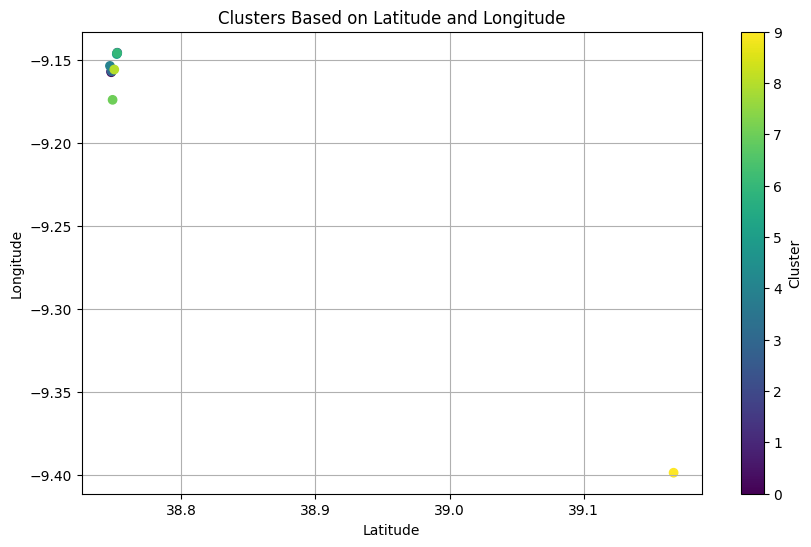

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(x=mean_clusters["latitude"], y=mean_clusters["longitude"], c=mean_clusters.index, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters Based on Latitude and Longitude')
plt.grid(True)
plt.show()

# Export the dataset with the customer_id and the cluster to which they belong

In [142]:
df = og_cluster[["kmeans_cluster"]]
df.to_csv("Clusters.csv")